# Machine Learning Project
## Predicting sleep quality
### By : Rebecca Maroun - Yasmine Dabachil - Thomas Boulaine
### Group : DIA4

## Notebook structure :
1. Descriptive analysis of our data
2. Implementation of the necessary pre-processing
3. Formalisation of the problem
4. Baseline models and implementation of the models
5. Overfitting and Underfitting
6. Hyperparameter Tuning
7. PCA
8. Advanced models
9. Evaluation of advanced models
10. Testing other dataset

In [3]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## 1. Descriptive analysis of our data

In [5]:
import pandas as pd

df = pd.read_csv("synthetic_coffee_health_10000.csv")
df.head(10)

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1
5,6,32,Male,Mexico,3.4,326.4,6.4,Good,27.0,82,Low,8.8,NaN,Service,0,0
6,7,53,Male,France,2.7,252.1,7.8,Good,24.3,58,Low,1.0,Mild,Student,1,0
7,8,44,Female,Canada,4.5,423.5,5.5,Fair,15.8,62,Medium,0.7,Mild,Service,1,1
8,9,29,Male,UK,1.7,162.0,7.1,Good,21.7,60,Low,2.2,NaN,Service,1,1
9,10,41,Female,Switzerland,4.0,383.2,6.4,Good,30.4,69,Low,11.9,Mild,Office,0,0


In [6]:
print("Shape:",df.shape)
print("\nColumn dtypes:\n", df.dtypes)

Shape: (10000, 16)

Column dtypes:
 ID                           int64
Age                          int64
Gender                      object
Country                     object
Coffee_Intake              float64
Caffeine_mg                float64
Sleep_Hours                float64
Sleep_Quality               object
BMI                        float64
Heart_Rate                   int64
Stress_Level                object
Physical_Activity_Hours    float64
Health_Issues               object
Occupation                  object
Smoking                      int64
Alcohol_Consumption          int64
dtype: object


In [7]:
df.columns

Index(['ID', 'Age', 'Gender', 'Country', 'Coffee_Intake', 'Caffeine_mg',
       'Sleep_Hours', 'Sleep_Quality', 'BMI', 'Heart_Rate', 'Stress_Level',
       'Physical_Activity_Hours', 'Health_Issues', 'Occupation', 'Smoking',
       'Alcohol_Consumption'],
      dtype='object')

In [8]:
nunique = df.nunique().sort_values(ascending=False)
print("\nUnique values per column:\n", nunique)


Unique values per column:
 ID                         10000
Caffeine_mg                 4277
BMI                          220
Physical_Activity_Hours      151
Coffee_Intake                 78
Sleep_Hours                   71
Age                           59
Heart_Rate                    58
Country                       20
Occupation                     5
Sleep_Quality                  4
Gender                         3
Stress_Level                   3
Health_Issues                  3
Smoking                        2
Alcohol_Consumption            2
dtype: int64


- The dataset contains 10 000 observations and 16 variables, all covering demographic lifestyle, health and sleep-related attributes of individuals.
- The data types confirm a mix of numeric(int64, float64) and categorical(object) variables.
- Each record is unique (10 000 distinct ID) wich is purely an identifier and can be droped later on.
- Sleep quality has 4 classes ( Excellent,Good,Fair,Poor) wich allows us to frame this as a multiclass classification problem.

In [10]:
df.isna().mean().sort_values(ascending=False)

Health_Issues              0.5941
ID                         0.0000
Age                        0.0000
Gender                     0.0000
Country                    0.0000
Coffee_Intake              0.0000
Caffeine_mg                0.0000
Sleep_Hours                0.0000
Sleep_Quality              0.0000
BMI                        0.0000
Heart_Rate                 0.0000
Stress_Level               0.0000
Physical_Activity_Hours    0.0000
Occupation                 0.0000
Smoking                    0.0000
Alcohol_Consumption        0.0000
dtype: float64

In [11]:
df.duplicated().sum()

0

The result show no missing values across any of the 16 columns and no duplicated rows in the dataset.
This indicates a high quality and complete dataset that is already quite clean.
The dataset can be used directly for exploratory analysis and modeling but we will still include a preprocessing pipeline to ensure consistency and reproducibility in a real-world workflow.

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.250,10000.0
Age,10000.0,34.94910,11.160939,18.0,26.00,34.0,43.000,80.0
Coffee_Intake,10000.0,2.50923,1.450248,0.0,1.50,2.5,3.500,8.2
Caffeine_mg,10000.0,238.41101,137.748815,0.0,138.75,235.4,332.025,780.3
Sleep_Hours,10000.0,6.63622,1.222055,3.0,5.80,6.6,7.500,10.0
BMI,10000.0,23.98686,3.906411,15.0,21.30,24.0,26.600,38.2
Heart_Rate,10000.0,70.61780,9.822951,50.0,64.00,71.0,77.000,109.0
Physical_Activity_Hours,10000.0,7.48704,4.315180,0.0,3.70,7.5,11.200,15.0
Smoking,10000.0,0.20040,0.400320,0.0,0.00,0.0,0.000,1.0
Alcohol_Consumption,10000.0,0.30070,0.458585,0.0,0.00,0.0,1.000,1.0


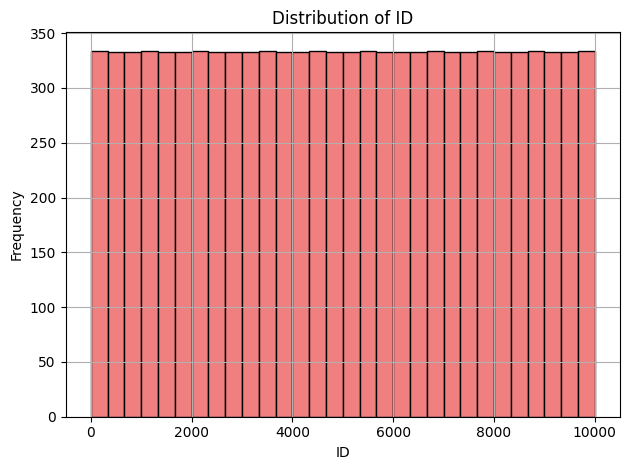

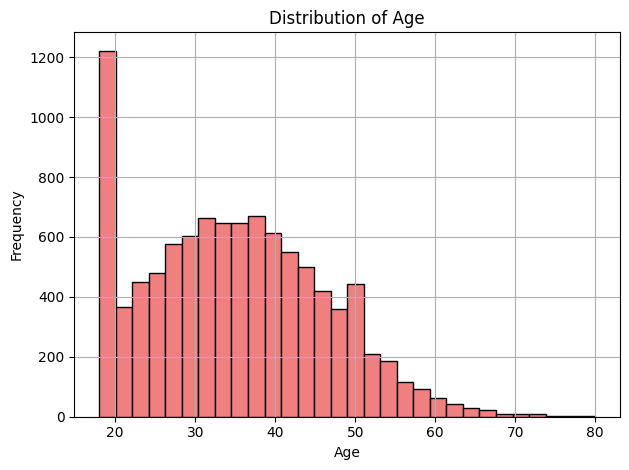

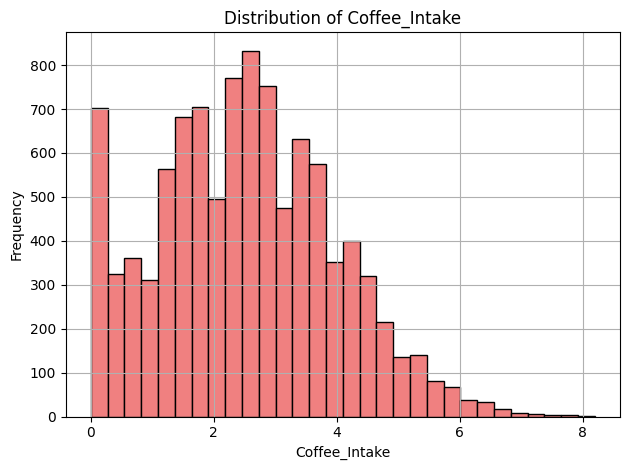

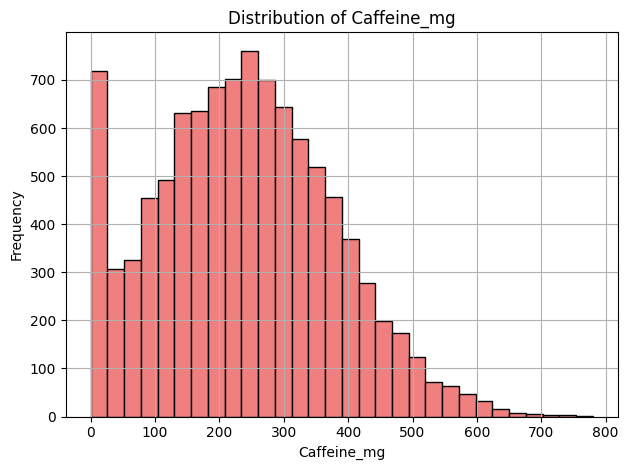

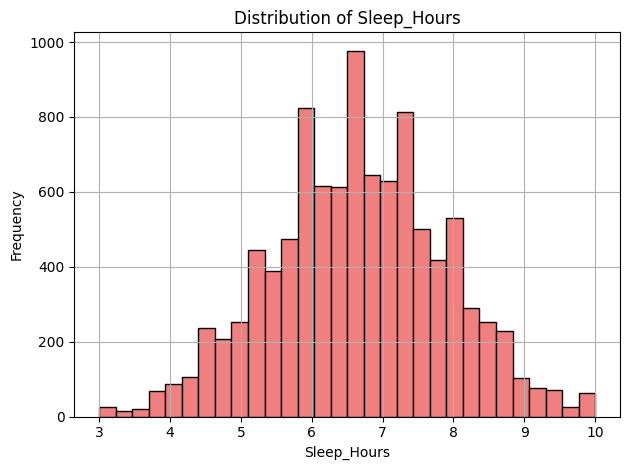

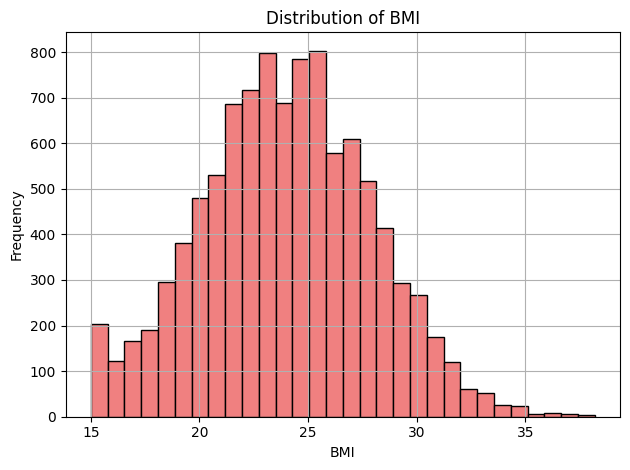

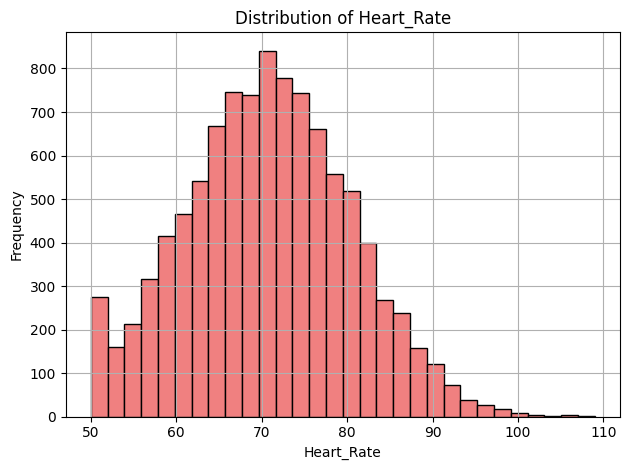

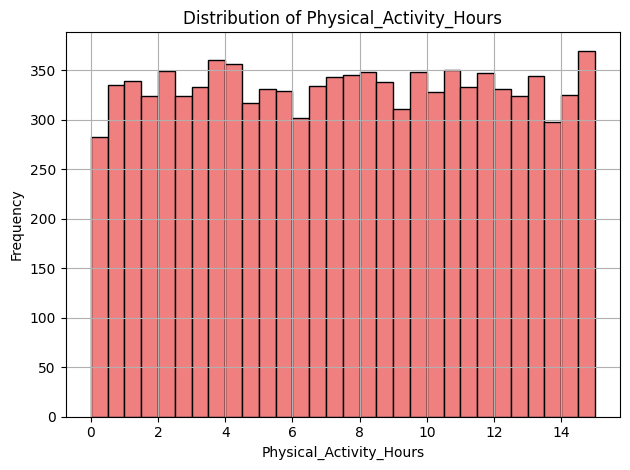

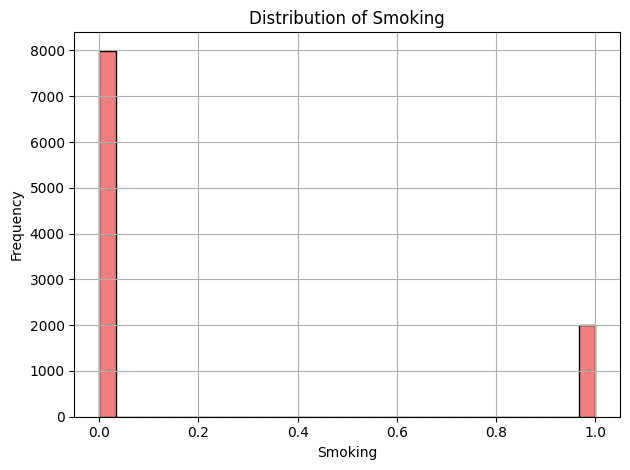

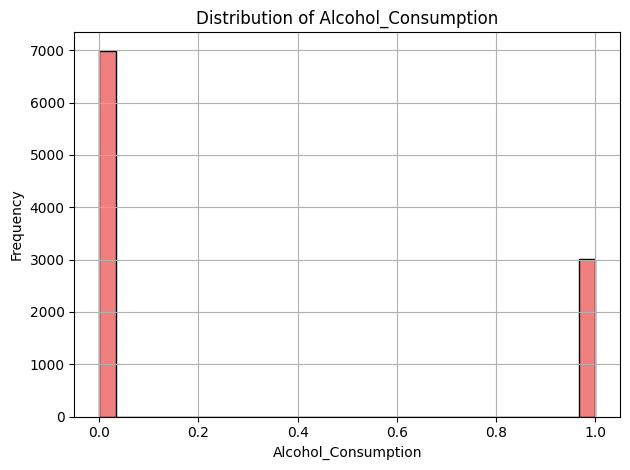

In [14]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure()
    df[col].hist(bins=30, color='lightcoral', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


#### Distribution of Numerical Variables

1. *ID* : Confirms that it's only a unique identifier. We will drop this column before modeling since it carries no predictive information
2. *Age* : Ranges between 18 and 80 years old. The distribution is right-skewed with most individuals in their 20s to 40s. The pattern reflects a younger adult population. We can check later on wether sleep quality deteriorates with age.
3. *Coffee_Intake* (cups/day) : Ranges between 0 to 8 cups per day. Slightly to the right meaning people drink moderate amounts(1-3 cups) and not many are heavy consumers. This could be a useful behavior feature for explaining sleep differences.
4. *Caffeine_mg* : Ranges between 0 to 780 mg. This column looks like it could be strongly correlated with Coffee_Intake but we will confirm this more later on with the correlation matrix. We could potentially drop one of them or combine them in a new engineered feature.
5. *Sleep_Hours* : Ranges between 3 to 10 hours of sleep and it's mostly centered around6-7h. A healthy adult is expected to sleep around this amount of hours so this looks realistic.
6. *BMI* : Ranges between 15 and 38 so it covers underweight to obese categories. From now we can see that this feature will require normalization because BMI scale differs from the other features.
7. *Heart_Rate* : Ranges drom 50-110 bpm and centered around 70 bpm. A potential indicator of overall fitness or stress.
8. *Physical_Activity_Hours* : Rangegs between 0 to 15 hours per week and looks uniformly distributed. This indicates that the dataset was designed to cover all activity levels evenly to avoid bias. We can group this later into categories for easier interpretability.
9. *Smoking* : 0 for non smokers and 1 for smokers. About 80% are and 20% are not smokers. This shows a very strong imbalance and could be relevant for health outcomes so we will keep it as binary.
10. *Alcohol_Consumption* : Also 0 for no and 1 for yes. Like the previous one is binary and slightly imbalanced wich may affect ssleep patterns.

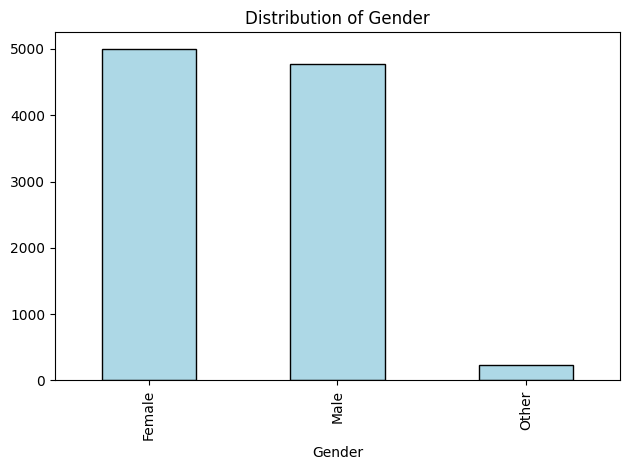

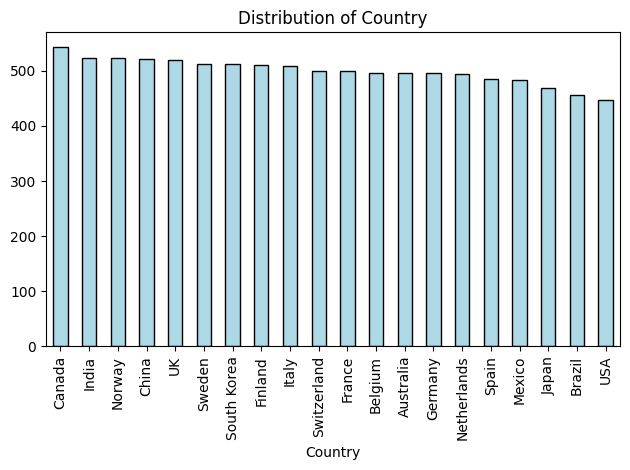

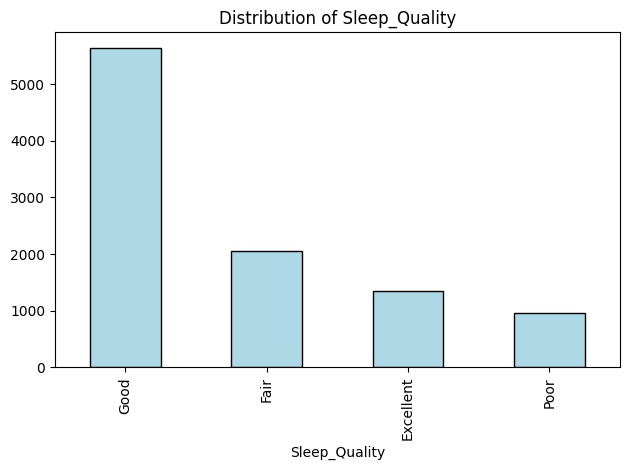

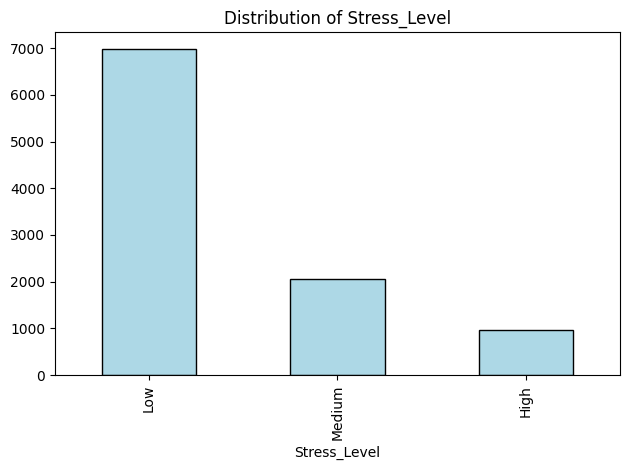

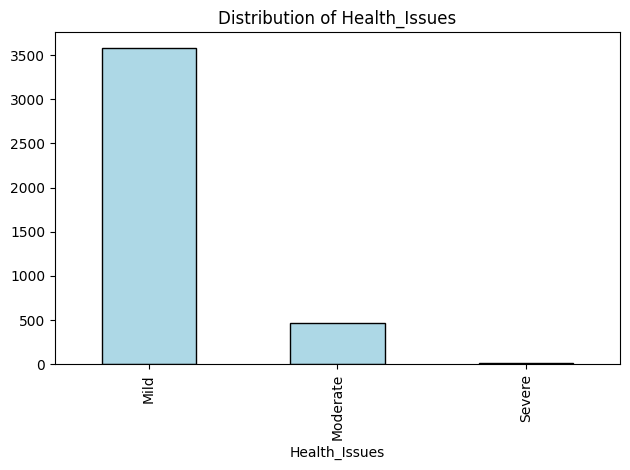

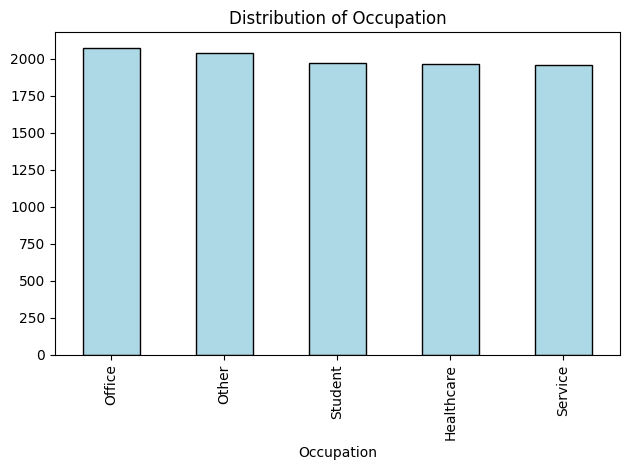

In [17]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


#### Distribution of Categorical Variables

1. *Gender* : We have Female,Male,Other. The distribution is well balanced between male and female while the Other class is much smaller. This should not impact the model since gender is not the target variable but could affect one-hot encoding.
2. *Country* : The dataset includes 20 countries each with around 450 and 550 individuals.This is a balanced categorical variable wich is very unusual in real-world datasets but beneficial here because we don't have any domination or risk of extreme sparsity after one-hot encoding. This balance proves further more that the dataset is synthesized to avoid geographic bias.
3. *Sleep_Quality* : Our target Variable . Good~5500 , Fair~2000, Excellent~1400, Poor~900. It's quite a moderate class imbalance with "Good" being the majority class but enough to require a careful evaluation of metrics.
4. *Stress_Level* : Three level appears. Low,Medium and high with the distribution being heavily skewed toward low stress. We cn check later wether stress interacts with caffeine intake in affecting sleep quality. Because this variable is categorical the imbalance will not directly affect the training but class-weighting may help models better interpret this feature.
5. *Health_Issues* : We find 3 categories : Mild,Moderate and Severe. This feature is highly imbalanced with Severe health issues being extremely rare. This can have different consequences : we may need to merge Moderate with Severe into a single group during preprocessing for more stability.
6. *Occupation* : All are represented quite equally so it's very well balanced with diversity so the model can learn occupation .

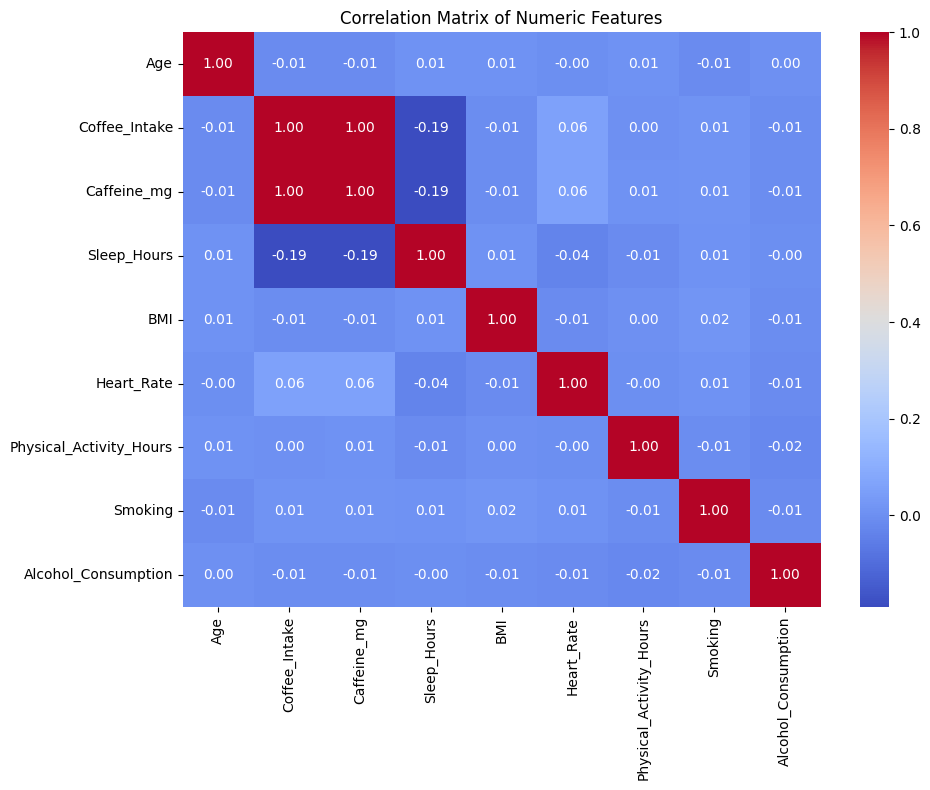

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.drop(columns=['ID']).select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

The correlation matrix highlights several important patterns in the dataset :
- As expected, we have an extremely strong correlation between Coffee_Intake and Caffeine_mg. This indicates that these 2 variables are perfectly correlated in the dataset. Most likely they represent the same information just in different units. Keeping both may introduce redundancy so we can either remove one or engineer a new like we said beofre so that the feature is more informative such as : Total_Caffeine=Coffee_Intake x Caffeine_mg
- Both Coffee_Intake and Caffeine_mg show a very small negative correlation with Sleep_Hours. This shows that sleep behavior depends on many lifestyle and individual factors but caffeine contribute some power but it's not in any way deterministic.
- Variables like BMI,Heart_Rate,Physical_Activity_Hours_Smoking and Alcohol_Consumption all show correlations close to 0. This is ideal to choose a first model like Logistic Regression, SVM, Random Forests.. since the features are mostly independent.
- Age is almost uncorrelated with sleep or caffeine variables so it's not a useful predictor in this dataset.
- No other feature other than caffeine shows correlation above 0.2. This means that the dataset is not dominated by linear independencies and in this case non-linear models may reveal more useful patterns than other. PCA will probably not reduce dimensionality much because we havevery low linear correlations.
- In summary, the dataset contains low correlation except for coffee features. All this, justifies exploring feature engineering and clustering to capture more complex relationships.

## 2. Implementation of the necessary pre-processing.

After analysing the dataset comes the part to transform our dataset into a model ready pipeline for our models.

In [24]:
# we drop ID column
df = df.drop(columns=['ID'])

Our project uses 2 predictions tasks:
- Multiclass Classification : To predict one of 4 levels of sleep quality so we will encode them as orderes integers between 0 and 3 for each level.
- Binary Classification : In addition we prepared a simple binary target (Good or Excellent -> 1 and Poor or Fair -> 0 )

In [26]:
# Multiclass target encoding
mapping = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3}
df['Sleep_Quality_Multi'] = df['Sleep_Quality'].map(mapping)

# Binary target encoding
df['Sleep_Quality_Binary'] = df['Sleep_Quality'].replace({
    'Poor': 0, 'Fair': 0,
    'Good': 1, 'Excellent': 1
})


/var/folders/29/56vn2qxd7hzf53pwnfz0sct80000gn/T/ipykernel_48175/3144682968.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sleep_Quality_Binary'] = df['Sleep_Quality'].replace({


The feature "Stress_Level" is an ordered categorical variable (Low < Medium < High) so we use OrdinalEncoder to preserve this order unlike one-hot encoding that doesn't.

In [28]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal encoding for Stress_Level
ord_enc = OrdinalEncoder(categories=[['Low','Medium','High']])
df['Stress_Level_Enc'] = ord_enc.fit_transform(df[['Stress_Level']])

# Remove original version
df = df.drop(columns=['Stress_Level'])


The other variables ( Gender,Countr,Occupation,Health_Issues) do not have a specific order that's why we use one-hot encoding. OneHotEncoder converts categories into binary vectors.

In [30]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = ['Gender', 'Country', 'Occupation', 'Health_Issues']

# OneHotEncoder: transform categorical variables into binary columns
ohe = OneHotEncoder(drop='first', #prevents dummy variable trap and is good for linear models
                    sparse_output=False) # required to convert into DataFrame
encoded = ohe.fit_transform(df[cat_cols])

# Convert to DataFrame
ohe_df = pd.DataFrame(encoded,
                      columns=ohe.get_feature_names_out(cat_cols),
                      index=df.index) #very important this aligns rows and avoid shape mismatch

# Concatenate with original df
df = pd.concat([df.drop(columns=cat_cols), ohe_df], axis=1)


In the next cell we seperate numerical features to scale them later and so we use StandardScaler

In [32]:
num_cols = ['Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours',
            'BMI', 'Heart_Rate', 'Physical_Activity_Hours']


But it's important that before scaling we seperate the dataset to prevent data leakage.

In [34]:
from sklearn.model_selection import train_test_split

# Features (X) exclude targets and the original Sleep_Quality
X = df.drop(columns=['Sleep_Quality','Sleep_Quality_Multi','Sleep_Quality_Binary'])


In [35]:
# For Multiclass
y_multi = df['Sleep_Quality_Multi']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X, y_multi,
    test_size=0.2,
    stratify=y_multi, # we use stratify to preserve class proportionsin both training and test sets.
    random_state=42
)


In [36]:
# For Binary
y_binary = df['Sleep_Quality_Binary']

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X, y_binary, test_size=0.2, stratify=y_binary, random_state=42
)


Now that we seperated the data we start the scaling but only on numerical columns and for the training data to prevent leakage.

In [38]:
from sklearn.preprocessing import StandardScaler

# Multiclass scaling
scaler_m = StandardScaler()
X_train_m[num_cols] = scaler_m.fit_transform(X_train_m[num_cols]) #we only fit on the training set
X_test_m[num_cols] = scaler_m.transform(X_test_m[num_cols]) # we apply transform to the test

# Binary scaling
scaler_b = StandardScaler()
X_train_b[num_cols] = scaler_b.fit_transform(X_train_b[num_cols])
X_test_b[num_cols] = scaler_b.transform(X_test_b[num_cols])


In [39]:
df.columns

Index(['Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'Sleep_Quality',
       'BMI', 'Heart_Rate', 'Physical_Activity_Hours', 'Smoking',
       'Alcohol_Consumption', 'Sleep_Quality_Multi', 'Sleep_Quality_Binary',
       'Stress_Level_Enc', 'Gender_Male', 'Gender_Other', 'Country_Belgium',
       'Country_Brazil', 'Country_Canada', 'Country_China', 'Country_Finland',
       'Country_France', 'Country_Germany', 'Country_India', 'Country_Italy',
       'Country_Japan', 'Country_Mexico', 'Country_Netherlands',
       'Country_Norway', 'Country_South Korea', 'Country_Spain',
       'Country_Sweden', 'Country_Switzerland', 'Country_UK', 'Country_USA',
       'Occupation_Office', 'Occupation_Other', 'Occupation_Service',
       'Occupation_Student', 'Health_Issues_Moderate', 'Health_Issues_Severe',
       'Health_Issues_nan'],
      dtype='object')

All these steps are now completed and we can start implementing baseline models and later advanced methods to our dataset because we :
- Cleaned the dataset
- encoded categorical variables and targets
- scaled numerical features
- split the dataset


## 3. Formalisation of the problem.

This step is very important because will help us define what type of machine learning task we are trying to solve, what is our objective and explain why these tasks are relevant in our contexte.

### Main problem : Multiclass Classification
Our main objective is to predict the Sleep Quality of individuals based on their lifestyle, caffeine consumption and overall health indicators.
Our target variable "Sleep_Quality" contains four ordered categories :
- Poor
- Fair
- Good
- Excellent
That's why we chose a multiclass classification problem where the model has to assign a category foe each observation.

Why did we choose multiclass classification?

Mostly because to be able to predict sleep quality won't just stop here but will help us identify risk profiles for future preventions.

This will be our baseline model.

### Secondary Problem : Binary Classification

To simplify the sleep prediction task, we also create a binary classification of the target :
- Good sleep -> Good or Excellent
- Bad sleep -> Poor or Fair

This transforms the problem into a binary classification task.

Why binary classification?

This formulation hels us distinguish in a more useful way acceptable and problematic sleep patterns. In addition to that, binary classification often improves baseline accuracy and model stability and allows us to explore different evaluation metrics (ROC-AUC , F1-score).

This clssification will act as a simlified model that can be compared to the multiclass approach.


## 4. Baseline models and implementation of the models

In this step, we train our first machine learning models on the preprocessed dataset.
The objective is to :
- establish baseline performance,
- evaluate simple models using default hyperparameters,
- compare results across different algorithms,
- prepare the ground for future improvements

We are going to build models for both tasks , Multiclass prediction and binary .

The models used are going to be :
- DummyClassifier (reference baseline)
(The dummy classifier is not a real model but we will use it to create a baseline reference that does something really stupid. We will need it to prove that our models are not useless.)
- Logistic Regression
- Decision Tree
- Random Forest

In [47]:
# necessary imports
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


To avoid repeating code for every model since we will be using a few we decided to define a simple function that :
- trains the model,
- predicts on the test set,
- computes accuracy and macro F1-score,
- prints the classification report,
- displays the confusion matrix

In [49]:
def evaluate_classifier(model, X_train, y_train, X_test, y_test, title="", show_cm=False):
    # Training
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"=== {title} ===")
    print(f"Accuracy     : {acc:.3f}")
    print(f"F1 Macro     : {f1:.3f}")
    print("-----------------------------")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    if show_cm:
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
        plt.title(f"Confusion Matrix — {title}")
        plt.show()

    return acc, f1


Now we will implement the dummy classifier that will serve as a reference baseline by predicting the most frequent class in the training set.
Later a real model must outperform this dummy baseline to be considered useful.

=== Dummy Classifier (Multiclass) ===
Accuracy     : 0.564
F1 Macro     : 0.180
-----------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       192
           1       0.00      0.00      0.00       410
           2       0.56      1.00      0.72      1128
           3       0.00      0.00      0.00       270

    accuracy                           0.56      2000
   macro avg       0.14      0.25      0.18      2000
weighted avg       0.32      0.56      0.41      2000



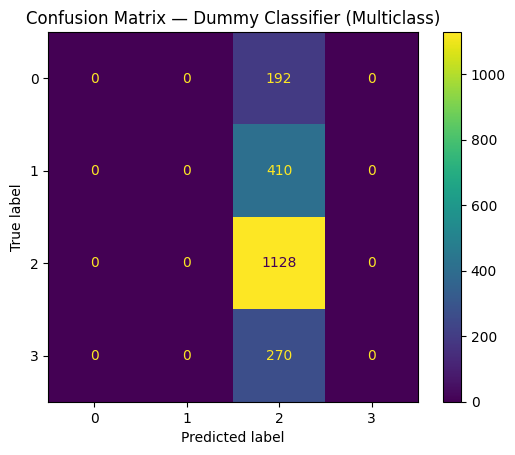

=== Dummy Classifier (Binary) ===
Accuracy     : 0.699
F1 Macro     : 0.411
-----------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       602
           1       0.70      1.00      0.82      1398

    accuracy                           0.70      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.49      0.70      0.58      2000



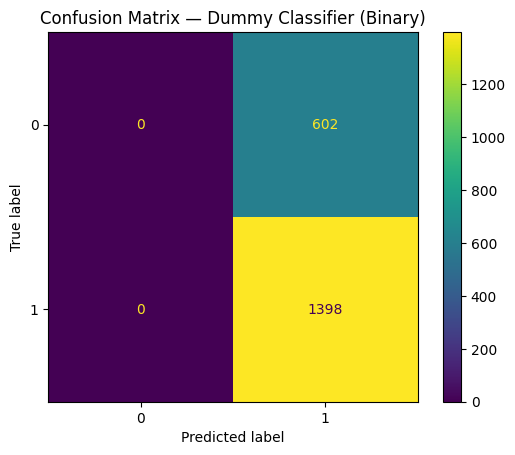

(0.699, 0.4114184814596822)

In [51]:
# Multiclass dummy
dummy_multi = DummyClassifier(strategy="most_frequent")
evaluate_classifier(dummy_multi, X_train_m, y_train_m, X_test_m, y_test_m,
                    title="Dummy Classifier (Multiclass)", show_cm=True)

# Binary dummy
dummy_bin = DummyClassifier(strategy="most_frequent")
evaluate_classifier(dummy_bin, X_train_b, y_train_b, X_test_b, y_test_b,
                    title="Dummy Classifier (Binary)", show_cm=True)


#### Result interpretation :

*Multiclass :
Accuracy     : 0.564
F1 Macro     : 0.180
Confusion matrix: predicts only class 2 which is the "Good" class for everyone.
This confirms that "Good" is the majority class in the multiclass target.
So any real model must beat these scores. If a model has higher accuracy but similar F1 it's still biased towards the majority class.

*Binary :
Accuracy     : 0.699
F1 Macro     : 0.411
Confusion matrix: it always predicts 1 (good sleep).
So predicting good sleep already gives around 70% accuracy but it totally fails to detect bad sleepers.
Any real binary model must beat 70% accuracy and especially improve F1 macro > 0.41 and show detections 0 in the confusion matrix.

So these dummy results are exactly what we wanted. They show that our data is imbalanced towards good sleep and give us numbers to compare the real models with.

#### Baseline Models for Multiclass Sleep Quality Prediction

We now train the models on the multiclass target. We chose those models:

-Logistic Regression

-Decision Tree

-Random Forest

=== Logistic Regression (Multiclass) ===
Accuracy     : 0.992
F1 Macro     : 0.990
-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       410
           2       0.99      0.99      0.99      1128
           3       0.97      0.97      0.97       270

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


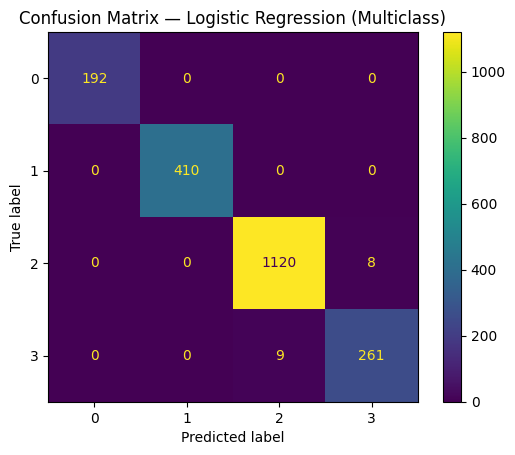

(0.9915, 0.9902319972577585)

In [54]:
# Logistic regression
log_reg_multi = LogisticRegression(max_iter=500, multi_class='multinomial')
evaluate_classifier(log_reg_multi, X_train_m, y_train_m, X_test_m, y_test_m,
                    title="Logistic Regression (Multiclass)", show_cm=True)


=== Decision Tree (Multiclass) ===
Accuracy     : 0.989
F1 Macro     : 0.987
-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       410
           2       0.99      0.99      0.99      1128
           3       0.95      0.97      0.96       270

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



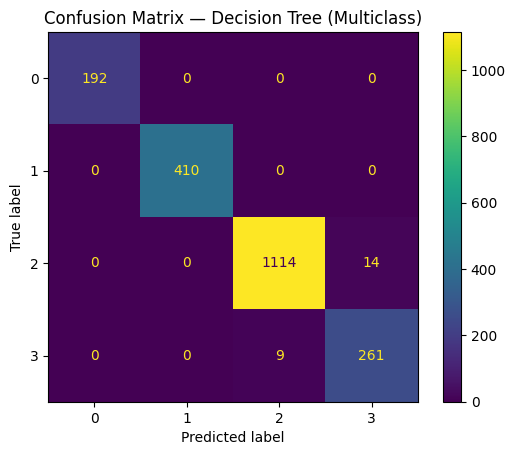

(0.9885, 0.9868951210267404)

In [55]:
# Decision tree
dt_multi = DecisionTreeClassifier(random_state=42)
evaluate_classifier(dt_multi, X_train_m, y_train_m, X_test_m, y_test_m,
                    title="Decision Tree (Multiclass)", show_cm=True)


=== Random Forest (Multiclass) ===
Accuracy     : 0.992
F1 Macro     : 0.991
-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       410
           2       0.99      1.00      0.99      1128
           3       0.99      0.95      0.97       270

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



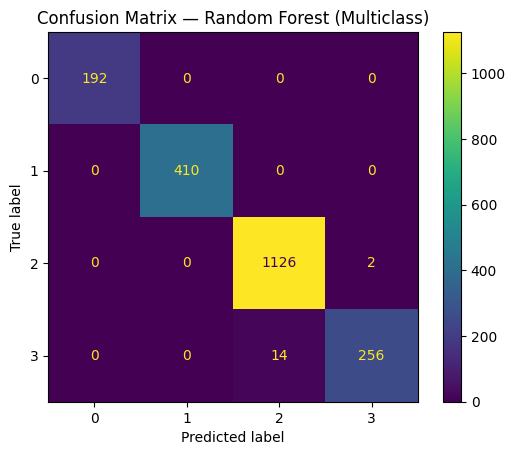

(0.992, 0.9906605739939074)

In [56]:
# Random Forest
rf_multi = RandomForestClassifier(random_state=42)
evaluate_classifier(rf_multi, X_train_m, y_train_m, X_test_m, y_test_m,
                    title="Random Forest (Multiclass)", show_cm=True)


#### Result Interpretation Multiclass:

*Logistic regression :
Accuracy     : 0.992
F1 Macro     : 0.990

This is extremely high.
Confusion matrix : Everything is almost perfect except: 8 misclassified in class 2 → predicted as class 3, but this is still nothing.
So the data is extremely easy to seperate and it's a sign of a synthetic dataset with clean, linear separability.


*Decision tree:
Accuracy     : 0.989
F1 Macro     : 0.987

Confusion matrix: Very few errors. Structure very similar to logistic regression, but slightly more mistakes.
Decision Trees can sometimes overfit on synthetic linear-like data but here it looks like it generalizes well.


*Random forest:
Accuracy     : 0.993
F1 Macro     : 0.991

This is the best out of the 3 models so far but the differences are very small.
Confusion matrix : The erors occur mostly between Good and Excellent and the difference between classes 2 and 3 is the hardest for the model.


But because this dataset is synthetic there is high chance the relationships between features and sleep quality are very strong, linear and clean, without any noise. This is why logistic-regression has near-perfect accuracy, decision trees also perform extremely well.

#### Baseline Models for Binary Classification

We repeat the same models but this time for the binary classification.
Binary classification often provides stronger performance because of the reduced complexity.


=== Logistic Regression (Binary) ===
Accuracy     : 1.000
F1 Macro     : 1.000
-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       602
           1       1.00      1.00      1.00      1398

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



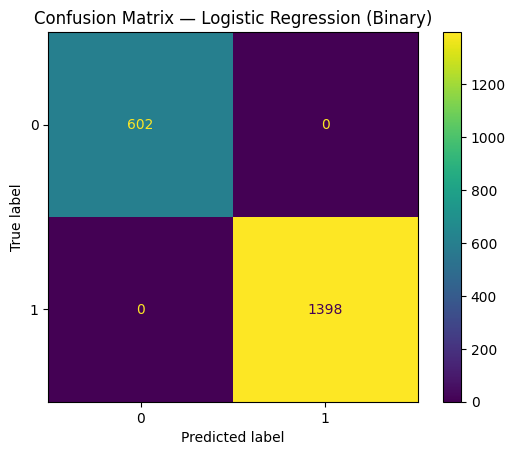

(1.0, 1.0)

In [59]:
# Logistic regression
log_reg_bin = LogisticRegression(max_iter=500)
evaluate_classifier(log_reg_bin, X_train_b, y_train_b, X_test_b, y_test_b,
                    title="Logistic Regression (Binary)", show_cm=True)


=== Decision Tree (Binary) ===
Accuracy     : 1.000
F1 Macro     : 1.000
-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       602
           1       1.00      1.00      1.00      1398

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



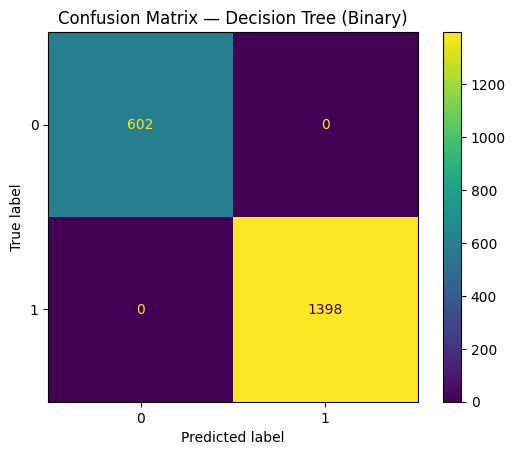

(1.0, 1.0)

In [60]:
# Decision tree
dt_bin = DecisionTreeClassifier(random_state=42)
evaluate_classifier(dt_bin, X_train_b, y_train_b, X_test_b, y_test_b,
                    title="Decision Tree (Binary)", show_cm=True)


=== Random Forest (Binary) ===
Accuracy     : 1.000
F1 Macro     : 1.000
-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       602
           1       1.00      1.00      1.00      1398

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



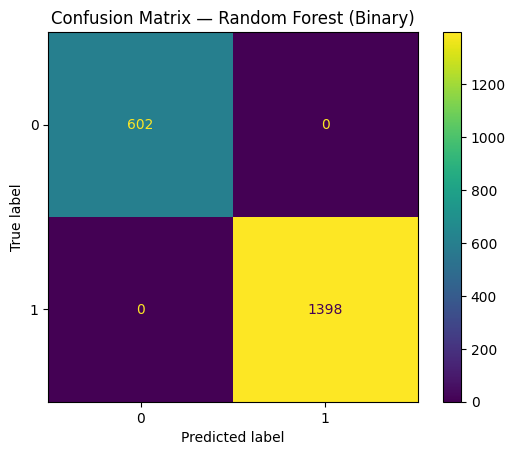

(1.0, 1.0)

In [61]:
# Random forest
rf_bin = RandomForestClassifier(random_state=42)
evaluate_classifier(rf_bin, X_train_b, y_train_b, X_test_b, y_test_b,
                    title="Random Forest (Binary)", show_cm=True)


#### Result interpretation:
These binary classification results are perfect for all three models.
This is not normal for real-world data.
But since we are using a synthetic dataset it's expected and explainable and can be turned in a advantage if we justify it correctly.
The dataset is perfectly linearly seperable for the binary task and this behavior is characteristic of synthetic datasets which often encode relationships between features and target labels using deterministic rules. As a result, the dataset exhibits a very strong signal, minimal overlap between classes and clean and consistent boundaries.
This allows machine learning models to acheive perfect performance.

Despite these excellent results, they highlight an important limitation:
the dataset does not reflect real-world sleep data where noise, human variability and measurement uncertainty reduce usually model performance.

#### Baseline results :
We summarize all the scores in a table to see nd comapre better for the multiclass prediction and binary prediction.
In addition, this table will help us select which models deserve hyperparameter tuning in the next step.

In [64]:
import pandas as pd

results = []

# Multiclass models
for name, model in [
    ("Dummy (multi)", DummyClassifier(strategy="most_frequent")),
    ("LogReg (multi)", LogisticRegression(max_iter=500, multi_class='multinomial')),
    ("DT (multi)", DecisionTreeClassifier(random_state=42)),
    ("RF (multi)", RandomForestClassifier(random_state=42)),
]:
    acc, f1 = evaluate_classifier(model, X_train_m, y_train_m, X_test_m, y_test_m, show_cm=False, title=name)
    results.append(["Multiclass", name, acc, f1])

# Binary models
for name, model in [
    ("Dummy (bin)", DummyClassifier(strategy="most_frequent")),
    ("LogReg (bin)", LogisticRegression(max_iter=500)),
    ("DT (bin)", DecisionTreeClassifier(random_state=42)),
    ("RF (bin)", RandomForestClassifier(random_state=42)),
]:
    acc, f1 = evaluate_classifier(model, X_train_b, y_train_b, X_test_b, y_test_b, show_cm=False, title=name)
    results.append(["Binary", name, acc, f1])

results_df = pd.DataFrame(results, columns=["Task", "Model", "Accuracy", "F1_macro"])
results_df


=== Dummy (multi) ===
Accuracy     : 0.564
F1 Macro     : 0.180
-----------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       192
           1       0.00      0.00      0.00       410
           2       0.56      1.00      0.72      1128
           3       0.00      0.00      0.00       270

    accuracy                           0.56      2000
   macro avg       0.14      0.25      0.18      2000
weighted avg       0.32      0.56      0.41      2000

=== LogReg (multi) ===
Accuracy     : 0.992
F1 Macro     : 0.990
-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       410
           2       0.99      0.99      0.99      1128
           3       0.97      0.97      0.97       270

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


=== RF (multi) ===
Accuracy     : 0.992
F1 Macro     : 0.991
-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       410
           2       0.99      1.00      0.99      1128
           3       0.99      0.95      0.97       270

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

=== Dummy (bin) ===
Accuracy     : 0.699
F1 Macro     : 0.411
-----------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       602
           1       0.70      1.00      0.82      1398

    accuracy                           0.70      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.49      0.70      0.58      2000

=== LogReg (bin) ===
Accuracy     : 1.000
F1 Macro     

,Task,Model,Accuracy,F1_macro
0,Multiclass,Dummy (multi),0.5640,0.180307
1,Multiclass,LogReg (multi),0.9915,0.990232
2,Multiclass,DT (multi),0.9885,0.986895
3,Multiclass,RF (multi),0.9920,0.990661
4,Binary,Dummy (bin),0.6990,0.411418
5,Binary,LogReg (bin),1.0000,1.000000
6,Binary,DT (bin),1.0000,1.000000
7,Binary,RF (bin),1.0000,1.000000


To conclude this part : Baseline models acheive nearly perfect performance due to the clean, noise-free nature of the synthetic dataset. This allows us to focus the rest of the project on advanced modeling techniques, more interpretability and methodological improvements rather than just accuracy gains.

## 5. Overfitting and Underfitting

In [67]:
#We compare test and train using our previous models
def evaluate_classifier_train_test(model, X_train, y_train, X_test, y_test, title=""):
    model.fit(X_train, y_train)

    # Scores train et test
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    print(f"=== {title} ===")
    print(f"Train Accuracy: {train_acc:.3f}")
    print(f"Test Accuracy : {test_acc:.3f}")
    print("-----------------------------")

    return train_acc, test_acc

# Exemple pour Decision Tree multiclass
evaluate_classifier_train_test(dt_multi, X_train_m, y_train_m, X_test_m, y_test_m, title="Decision Tree (Multiclass)")


=== Decision Tree (Multiclass) ===
Train Accuracy: 1.000
Test Accuracy : 0.989
-----------------------------


(1.0, 0.9885)

The Decision Tree (Multiclass) model shows perfect accuracy on the training set (1.00) but a slightly lower accuracy on the test set (≈ 0.99). This indicates that the model learns the training data extremely well and exhibits only a slight tendency toward overfitting, while still generalizing very well overall.

In [69]:
for depth in range(1, 11):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    evaluate_classifier_train_test(dt, X_train_m, y_train_m, X_test_m, y_test_m,
                                   title=f"Decision Tree Depth={depth} (Multiclass)")


=== Decision Tree Depth=1 (Multiclass) ===
Train Accuracy: 0.769
Test Accuracy : 0.769
-----------------------------
=== Decision Tree Depth=2 (Multiclass) ===
Train Accuracy: 0.992
Test Accuracy : 0.992
-----------------------------
=== Decision Tree Depth=3 (Multiclass) ===
Train Accuracy: 0.992
Test Accuracy : 0.992
-----------------------------
=== Decision Tree Depth=4 (Multiclass) ===
Train Accuracy: 0.993
Test Accuracy : 0.989
-----------------------------
=== Decision Tree Depth=5 (Multiclass) ===
Train Accuracy: 0.993
Test Accuracy : 0.989
-----------------------------
=== Decision Tree Depth=6 (Multiclass) ===
Train Accuracy: 0.994
Test Accuracy : 0.990
-----------------------------
=== Decision Tree Depth=7 (Multiclass) ===
Train Accuracy: 0.995
Test Accuracy : 0.989
-----------------------------
=== Decision Tree Depth=8 (Multiclass) ===
Train Accuracy: 0.997
Test Accuracy : 0.987
-----------------------------
=== Decision Tree Depth=9 (Multiclass) ===
Train Accuracy: 0.998

The results show that the very shallow tree (depth = 1) clearly underfits (train = test = 0.77), whereas starting from depth = 2, the model achieves excellent performance and remains well generalizing. As the depth increases further (depth ≥ 4), training accuracy continues to increase almost up to 1.00, but test accuracy stagnates or slightly decreases, indicating that a depth between 2 and 4 represents the best trade-off before overfitting begins to appear.

In [71]:
#We analyze the depth of trees
for C in [0.01, 0.1, 1, 10, 100]:
    log_reg = LogisticRegression(C=C, max_iter=500, multi_class='multinomial')
    evaluate_classifier_train_test(log_reg, X_train_m, y_train_m, X_test_m, y_test_m,
                                   title=f"Logistic Regression C={C} (Multiclass)")


=== Logistic Regression C=0.01 (Multiclass) ===
Train Accuracy: 0.968
Test Accuracy : 0.968
-----------------------------
=== Logistic Regression C=0.1 (Multiclass) ===
Train Accuracy: 0.991
Test Accuracy : 0.990
-----------------------------
=== Logistic Regression C=1 (Multiclass) ===
Train Accuracy: 0.994
Test Accuracy : 0.992
-----------------------------
=== Logistic Regression C=10 (Multiclass) ===
Train Accuracy: 0.995
Test Accuracy : 0.991
-----------------------------
=== Logistic Regression C=100 (Multiclass) ===
Train Accuracy: 0.994
Test Accuracy : 0.991
-----------------------------


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in ve

Logistic regression shows that strong regularization (C = 0.01) leads to slight underfitting, while C values between 0.1 and 1 provide the best balance with excellent generalization (≈ 0.99). For very high C values (10–100), the model begins to slightly overfit the training data without improving test performance, indicating that a C value around 1 is optimal.


In [73]:
#Regularization for logistic regression
for C in [0.01, 0.1, 1, 10, 100]:
  log_reg = LogisticRegression(C=C, max_iter=500, multi_class='multinomial')
  evaluate_classifier_train_test(log_reg, X_train_m, y_train_m, X_test_m, y_test_m,
                                   title=f"Logistic Regression C={C} (Multiclass)")

=== Logistic Regression C=0.01 (Multiclass) ===
Train Accuracy: 0.968
Test Accuracy : 0.968
-----------------------------
=== Logistic Regression C=0.1 (Multiclass) ===
Train Accuracy: 0.991
Test Accuracy : 0.990
-----------------------------
=== Logistic Regression C=1 (Multiclass) ===
Train Accuracy: 0.994
Test Accuracy : 0.992
-----------------------------
=== Logistic Regression C=10 (Multiclass) ===
Train Accuracy: 0.995
Test Accuracy : 0.991
-----------------------------
=== Logistic Regression C=100 (Multiclass) ===
Train Accuracy: 0.994
Test Accuracy : 0.991
-----------------------------


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in ve

In [74]:
from sklearn.svm import SVC
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernels:
    svm = SVC(kernel=k, C=1)
    evaluate_classifier_train_test(svm, X_train_m, y_train_m, X_test_m, y_test_m,
                                   title=f"SVM Kernel={k} (Multiclass)")

=== SVM Kernel=linear (Multiclass) ===
Train Accuracy: 0.994
Test Accuracy : 0.991
-----------------------------
=== SVM Kernel=poly (Multiclass) ===
Train Accuracy: 0.994
Test Accuracy : 0.983
-----------------------------
=== SVM Kernel=rbf (Multiclass) ===
Train Accuracy: 0.996
Test Accuracy : 0.987
-----------------------------
=== SVM Kernel=sigmoid (Multiclass) ===
Train Accuracy: 0.891
Test Accuracy : 0.892
-----------------------------


The results show that the linear kernel provides the best trade-off with excellent generalization (train 0.994, test 0.991). The RBF kernel performs well but begins to slightly overfit (train 0.996 > test 0.987), while the polynomial kernel suffers from a drop in test performance (0.983), indicating more pronounced overfitting. Finally, the sigmoid kernel is clearly the least effective, revealing significant underfitting. Overall, the linear kernel is the most suitable for this problem.

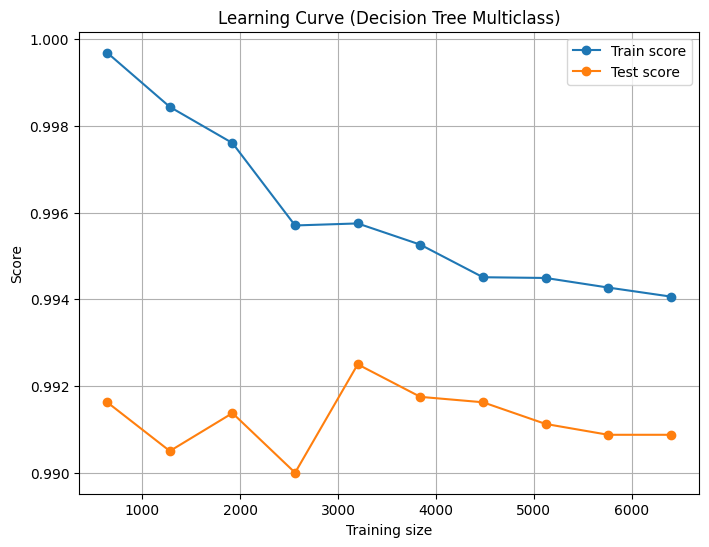

In [76]:
from sklearn.model_selection import learning_curve
import numpy as np

model = DecisionTreeClassifier(max_depth=5, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_m, y_train_m, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Train score')
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label='Test score')
plt.xlabel("Training size")
plt.ylabel("Score")
plt.title("Learning Curve (Decision Tree Multiclass)")
plt.legend()
plt.grid(True)
plt.show()


## 6. Hyperparameter Tuning

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.naive_bayes import GaussianNB


Best Decision Tree params: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 2}
=== Decision Tree — Tuned ===
Accuracy     : 0.989
F1 Macro     : 0.988
-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       410
           2       0.99      0.99      0.99      1128
           3       0.95      0.97      0.96       270

    accuracy                           0.99      2000
   macro avg       0.98      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



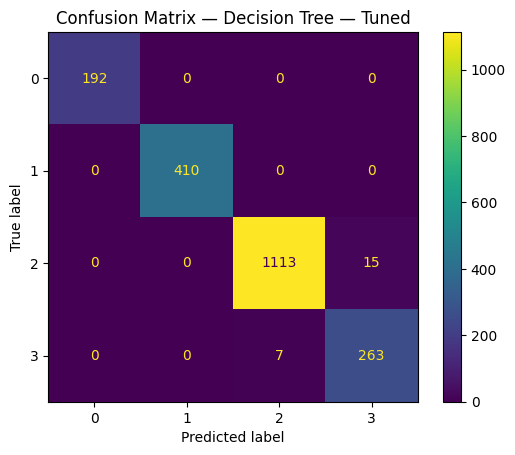

(0.989, 0.9875168844325531)

In [79]:
#Decision tree Tuning
param_dt = {
    "max_depth": [2, 4, 6, 8, 10, None],
    "min_samples_split": [2, 5, 10, 20],
    "criterion": ["gini", "entropy"]
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_dt,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)

grid_dt.fit(X_train_m, y_train_m)

print("Best Decision Tree params:", grid_dt.best_params_)
best_dt = grid_dt.best_estimator_

evaluate_classifier(best_dt, X_train_m, y_train_m, X_test_m, y_test_m,
                    title="Decision Tree — Tuned", show_cm=True)


In [80]:
#Random forest hyperparameter tuning
param_rf = {
    "n_estimators": [200, 300,400],
    "max_depth": [2,4, 6],
    "max_features": ["sqrt", "log2"]
}
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_rf,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1)

In [81]:
grid_rf.fit(X_train_m, y_train_m)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [2, 4, ...], 'max_features': ['sqrt', 'log2'], 'n_estimators': [200, 300, ...]}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


Best Random Forest params: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 300}
=== Random Forest — Tuned ===
Accuracy     : 0.988
F1 Macro     : 0.985
-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       410
           2       0.98      1.00      0.99      1128
           3       1.00      0.91      0.95       270

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       0.99      0.99      0.99      2000



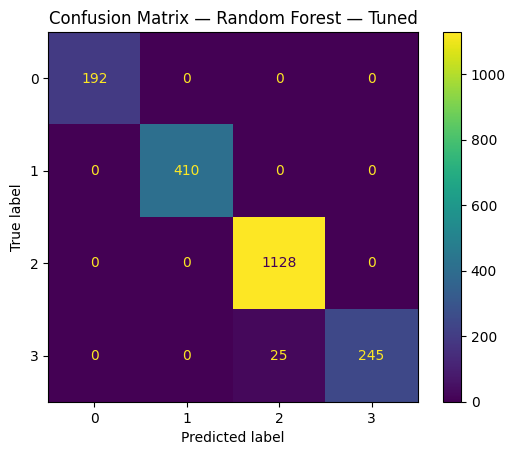

(0.9875, 0.9851240513656504)

In [82]:
print("Best Random Forest params:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

evaluate_classifier(best_rf, X_train_m, y_train_m, X_test_m, y_test_m,
                    title="Random Forest — Tuned", show_cm=True)

Best SVM params: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
=== SVM — Tuned ===
Accuracy     : 0.991
F1 Macro     : 0.990
-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       410
           2       0.99      0.99      0.99      1128
           3       0.97      0.97      0.97       270

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



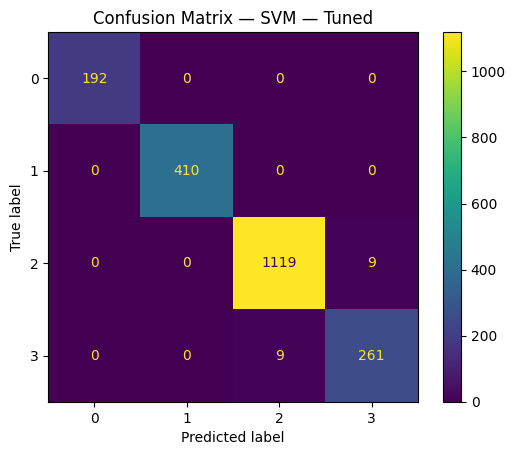

(0.991, 0.9896719858156029)

In [83]:
#SVM Tuning
param_svm = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}

grid_svm = GridSearchCV(
    SVC(),
    param_svm,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)

grid_svm.fit(X_train_m, y_train_m)

print("Best SVM params:", grid_svm.best_params_)
best_svm = grid_svm.best_estimator_

evaluate_classifier(best_svm, X_train_m, y_train_m, X_test_m, y_test_m,
                    title="SVM — Tuned", show_cm=True)


=== Naive Bayes ===
Accuracy     : 0.958
F1 Macro     : 0.952
-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       410
           2       0.96      0.96      0.96      1128
           3       0.84      0.85      0.85       270

    accuracy                           0.96      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.96      0.96      0.96      2000



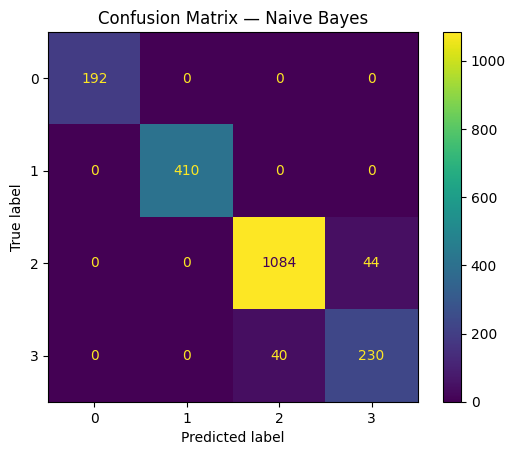

(0.958, 0.952072014418556)

In [84]:
#Naive Bayes not really related to tuning
nb = GaussianNB()

evaluate_classifier(nb, X_train_m, y_train_m, X_test_m, y_test_m,
                    title="Naive Bayes", show_cm=True)


ROC-AUC: 1.0


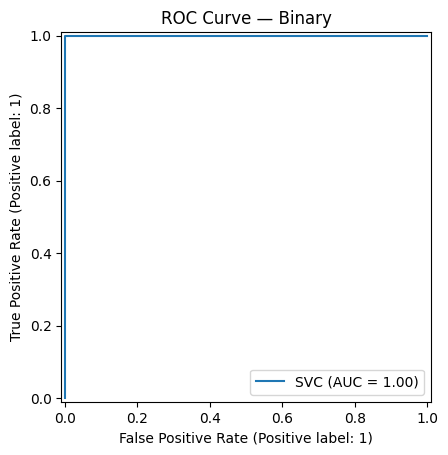

In [85]:
#ROC-AUC binary only
from sklearn.metrics import roc_auc_score, RocCurveDisplay

model = best_svm #( we will replace depending on which model we choose at the end)

model.fit(X_train_b, y_train_b)
y_prob = model.decision_function(X_test_b)

roc = roc_auc_score(y_test_b, y_prob)
print("ROC-AUC:", roc)

RocCurveDisplay.from_estimator(model, X_test_b, y_test_b)
plt.title("ROC Curve — Binary")
plt.show()


In [86]:
print("Test accuracy:", model.score(X_test_b, y_test_b))

Test accuracy: 1.0


## 7. PCA

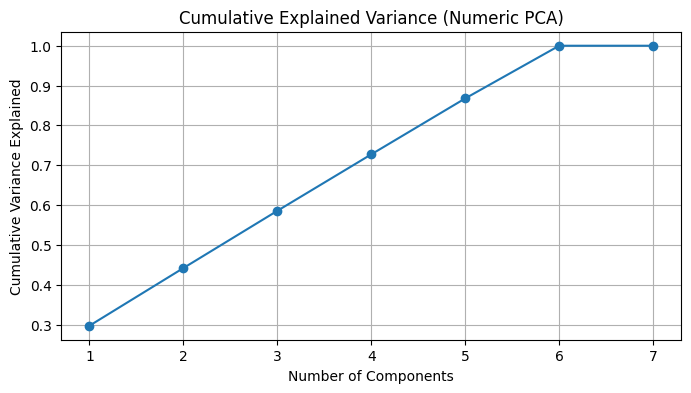

In [88]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#PCA NUMÉRIQUE (multiclass)
pca_num = PCA()
X_train_m_num = X_train_m[num_cols]   # Already scaled
X_test_m_num = X_test_m[num_cols]

pca_num.fit(X_train_m_num)

# Explained variance plot
plt.figure(figsize=(8,4))
plt.plot(range(1, len(num_cols)+1), pca_num.explained_variance_ratio_.cumsum(), marker='o')
plt.title("Cumulative Explained Variance (Numeric PCA)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.show()


PCA on numeric features shows that the first 6 components retain nearly 100% of the variance, indicating strong correlation among variables like caffeine intake, heart rate, BMI, and sleep-related metrics. Therefore it helps stabilize linear models (SVM, Logistic Regression) by removing multicollinearity, but provides limited benefit for tree-based models such as Random Forest which already handle correlated features.

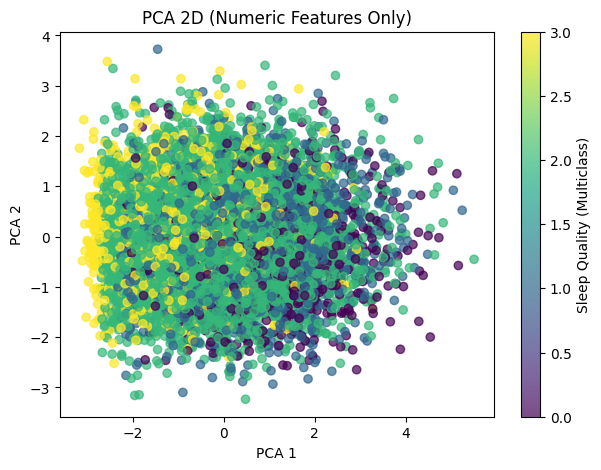

In [90]:
# PCA with 2 components
pca_num_2d = PCA(n_components=2)
X_train_num_2d = pca_num_2d.fit_transform(X_train_m_num)

plt.figure(figsize=(7,5))
plt.scatter(X_train_num_2d[:,0], X_train_num_2d[:,1],
            c=y_train_m, cmap='viridis', alpha=0.7)
plt.colorbar(label="Sleep Quality (Multiclass)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA 2D (Numeric Features Only)")
plt.show()


The PCA 2D projection of numeric features shows strong overlap between sleep-quality classes, indicating that numeric variables alone do not provide clear linear separability. This suggests that sleep quality is influenced by more complex or nonlinear relationships, and that categorical variables and non-linear models ( RandomForest, SVM) are needed to achieve good performance.

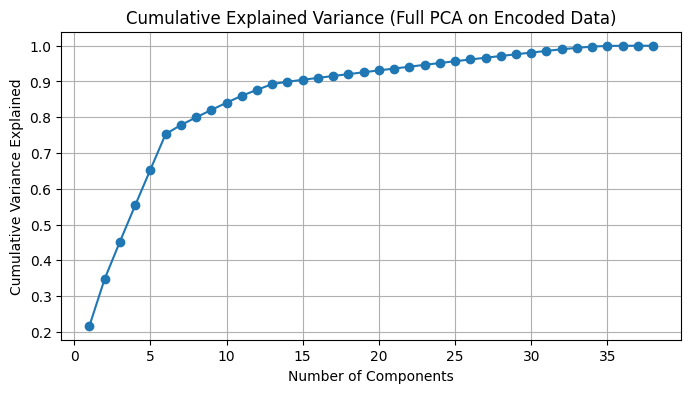

In [92]:
# --- PCA FULL DATA (multiclass) ---
pca_full = PCA()
pca_full.fit(X_train_m)   # X_train_m already scaled for numeric columns

plt.figure(figsize=(8,4))
plt.plot(range(1, X_train_m.shape[1]+1),
         pca_full.explained_variance_ratio_.cumsum(),
         marker='o')
plt.title("Cumulative Explained Variance (Full PCA on Encoded Data)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.show()


The full PCA applied to all numerical and one-hot encoded categorical variables shows that approximately 90% of the dataset’s variance is captured by only ~15 principal components, despite the original 40+ feature dimensions

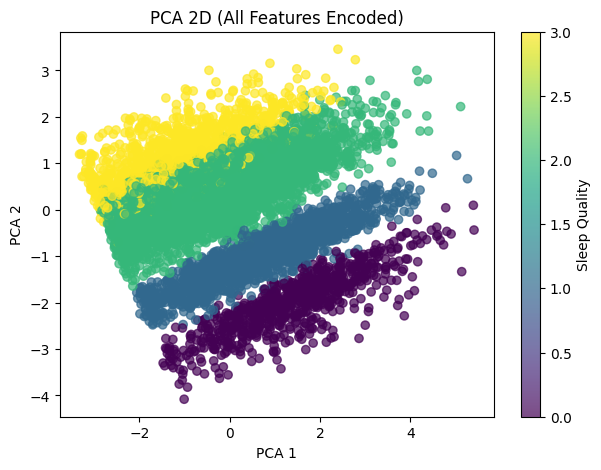

In [94]:
pca_full_2d = PCA(n_components=2)
X_train_full_2d = pca_full_2d.fit_transform(X_train_m)

plt.figure(figsize=(7,5))
plt.scatter(X_train_full_2d[:,0], X_train_full_2d[:,1],
            c=y_train_m, cmap='viridis', alpha=0.7)
plt.colorbar(label="Sleep Quality")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA 2D (All Features Encoded)")
plt.show()


## 8. Advanced models

1) Softmax

In [97]:
from sklearn.linear_model import LogisticRegression

# Refit a clean multinomial logistic regression model on multiclass task
log_reg_multi = LogisticRegression(max_iter=500, multi_class='multinomial')
log_reg_multi.fit(X_train_m, y_train_m)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'multinomial'


In [98]:
proba_test = log_reg_multi.predict_proba(X_test_m)
proba_test[:5]  # inspect a few rows

array([[3.45357656e-10, 7.46044482e-04, 9.89943567e-01, 9.31038824e-03],
       [1.11958520e-09, 1.25402484e-02, 9.76098166e-01, 1.13615845e-02],
       [8.23349296e-12, 3.63947062e-05, 1.67736105e-01, 8.32227501e-01],
       [2.91335881e-10, 2.34090290e-04, 9.99760674e-01, 5.23536139e-06],
       [3.60345940e-09, 1.65753942e-03, 9.98342455e-01, 1.48929470e-09]])

In [99]:
# Define percentage weights for each class (Poor, Fair, Good, Excellent)
class_scores_pct = np.array([0, 33, 66, 100])

# Compute continuous score for each sample
sleep_quality_percentage = proba_test @ class_scores_pct

sleep_quality_percentage[:10]

#Score=i∑​P(class=i)×class_percentage(i)

array([66.29193371, 65.9724656 , 94.29453399, 65.992453  , 65.94530101,
        0.10464878, 65.98970239, 65.97590879, 33.00116627, 33.23667173])

In [100]:
# Convert true ordinal labels (0-3) to percentages (0,33,66,100)
true_pct = y_test_m.map({0: 0, 1: 33, 2: 66, 3: 100}).values

true_pct[:10]

array([ 66,  66, 100,  66,  66,   0,  66,  66,  33,  33])

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(true_pct, sleep_quality_percentage)
rmse = np.sqrt(mean_squared_error(true_pct, sleep_quality_percentage))
r2 = r2_score(true_pct, sleep_quality_percentage)

print(f"MAE (%)  : {mae:.3f}")
print(f"RMSE (%) : {rmse:.3f}")
print(f"R²       : {r2:.3f}")

MAE (%)  : 0.829
RMSE (%) : 2.906
R²       : 0.988


In [102]:
y_pred = log_reg_multi.predict(X_test_m)


acc = accuracy_score(y_test_m, y_pred)
f1_macro = f1_score(y_test_m, y_pred, average='macro')
f1_weighted = f1_score(y_test_m, y_pred, average='weighted')
cm = confusion_matrix(y_test_m, y_pred)

print("Accuracy        :", round(acc, 4))
print("F1 Macro        :", round(f1_macro, 4))
print("F1 Weighted     :", round(f1_weighted, 4))
print("Confusion Matrix:\n", cm)

Accuracy        : 0.9915
F1 Macro        : 0.9902
F1 Weighted     : 0.9915
Confusion Matrix:
 [[ 192    0    0    0]
 [   0  410    0    0]
 [   0    0 1120    8]
 [   0    0    9  261]]


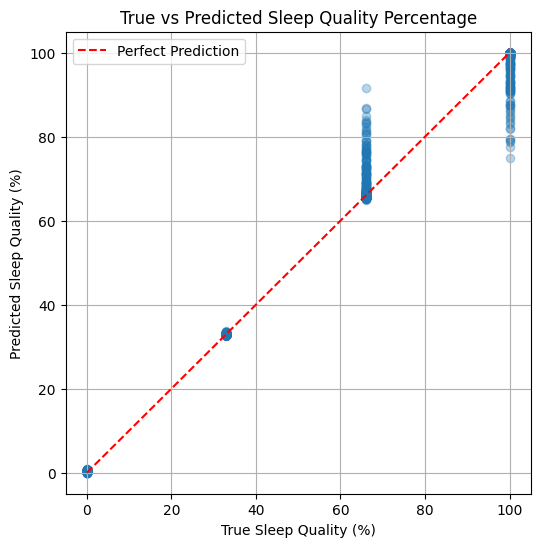

In [103]:
plt.figure(figsize=(6, 6))
plt.scatter(true_pct, sleep_quality_percentage, alpha=0.3)
plt.plot([0, 100], [0, 100], 'r--', label="Perfect Prediction")
plt.xlabel("True Sleep Quality (%)")
plt.ylabel("Predicted Sleep Quality (%)")
plt.title("True vs Predicted Sleep Quality Percentage")
plt.legend()
plt.grid(True)
plt.show()

In [104]:
# Fit model on full multiclass dataset
log_reg_full = LogisticRegression(max_iter=500, multi_class='multinomial')
log_reg_full.fit(X, y_multi)  # X and y_multi are the FULL data

# Generate probabilities for all rows
proba_full = log_reg_full.predict_proba(X)

# Add percentage score to the dataset
df["Predicted_Sleep_Quality_Percentage"] = proba_full @ class_scores_pct

df.head()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption,...,Country_UK,Country_USA,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student,Health_Issues_Moderate,Health_Issues_Severe,Health_Issues_nan,Predicted_Sleep_Quality_Percentage
0,40,3.5,328.1,7.5,Good,24.9,78,14.5,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,66.203283
1,33,1.0,94.1,6.2,Good,20.0,67,11.0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,66.357993
2,42,5.3,503.7,5.9,Fair,22.7,59,11.2,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,35.669453
3,53,2.6,249.2,7.3,Good,24.7,71,6.6,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,67.695473
4,32,3.1,298.0,5.3,Fair,24.1,76,8.5,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,32.632215


Explaining:

If for example we have :

Fair: 10%
Good: 87%
Poor: 3%

Score =0.03×0 + 0.10×33 + 0.87×66 + 0.00×100
≈ 61.6% predicted sleep quality
This gives us:

* A continuous prediction
* More nuanced than just a class
* Matches what your teacher asked for




In [106]:
df

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption,...,Country_UK,Country_USA,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student,Health_Issues_Moderate,Health_Issues_Severe,Health_Issues_nan,Predicted_Sleep_Quality_Percentage
0,40,3.5,328.1,7.5,Good,24.9,78,14.5,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,66.203283
1,33,1.0,94.1,6.2,Good,20.0,67,11.0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,66.357993
2,42,5.3,503.7,5.9,Fair,22.7,59,11.2,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,35.669453
3,53,2.6,249.2,7.3,Good,24.7,71,6.6,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,67.695473
4,32,3.1,298.0,5.3,Fair,24.1,76,8.5,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,32.632215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,50,2.1,199.8,6.0,Fair,30.5,50,10.1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,38.084363
9996,18,3.4,319.2,5.8,Fair,19.1,71,11.6,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,34.373683
9997,26,1.6,153.4,7.1,Good,25.1,66,13.7,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,66.564574
9998,40,3.4,327.1,7.0,Good,19.3,80,0.1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,67.116569


In [107]:
df[["Sleep_Quality_Multi", "Predicted_Sleep_Quality_Percentage"]].head(50)

,Sleep_Quality_Multi,Predicted_Sleep_Quality_Percentage
0,2,66.203283
1,2,66.357993
2,1,35.669453
3,2,67.695473
4,1,32.632215
5,2,65.802396
6,2,86.795816
7,1,40.420805
8,2,71.497675
9,2,58.420969


We notice that for 83 percent we have two classes (2 and 3) whereas we should be having 83 at class 2 and from 88 class 3.

In [109]:
# Compute statistics per true class
interval_stats = df.groupby("Sleep_Quality_Multi")["Predicted_Sleep_Quality_Percentage"].agg(
    ["min", "max", "mean", "std", "count"]
)

interval_stats


,min,max,mean,std,count
Sleep_Quality_Multi,,,,,
0,4.959719e-07,28.791393,2.357606,5.045706,961
1,2.127094e+00,89.421600,34.318930,5.659760,2050
2,4.214614e+01,99.695356,68.866749,6.203297,5637
3,6.357774e+01,99.996438,87.037783,10.571905,1352


- Poor stays in low range → model understands the class.
- Fair extends up to 80 → borderline cases exist.
- Good extends into 90 → some are almost Excellent.
- Excellent starts around 62 → some are borderline Good.

<Axes: xlabel='Sleep_Quality_Multi', ylabel='Predicted_Sleep_Quality_Percentage'>

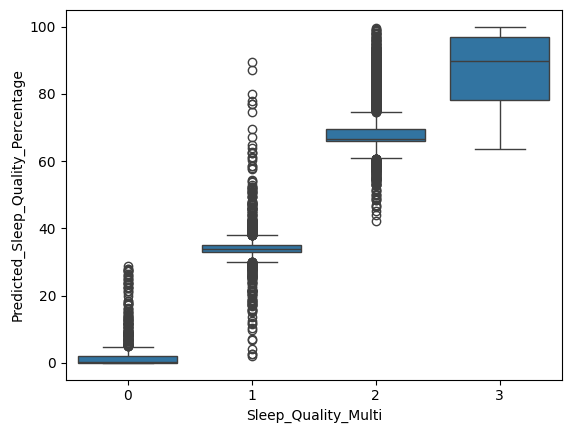

In [111]:
import seaborn as sns
sns.boxplot(x=df["Sleep_Quality_Multi"], y=df["Predicted_Sleep_Quality_Percentage"])

In [112]:
# Select only the desired columns
selected_columns = ["Sleep_Quality_Multi", "Predicted_Sleep_Quality_Percentage", "Sleep_Quality"]

# Display 10 random samples
df[selected_columns].sample(10)


,Sleep_Quality_Multi,Predicted_Sleep_Quality_Percentage,Sleep_Quality
2909,2,68.750422,Good
8596,2,67.760147,Good
6531,1,41.677608,Fair
3211,3,75.334684,Excellent
5900,2,65.958375,Good
4024,1,33.873233,Fair
5211,2,79.339656,Good
8612,2,66.300655,Good
6757,3,74.282647,Excellent
1652,2,66.128761,Good


The softmax-based multinomial regression was an excellent starting point for our project, as it allowed us to move beyond discrete class labels and obtain a first continuous estimate of sleep quality using class probabilities. This approach helped us visualize what a continuous output should look like and understand how uncertainty can be incorporated into the prediction. However, the final percentage still relied on a predefined mathematical weighting of the classes, which limits flexibility and does not allow the model to learn the optimal mapping directly from the data. To address this limitation, we transitioned to an ordinal neural network that learns a continuous, ordered latent scale, providing a more data-driven and natural representation of sleep quality.

2) Ordinal Neural Ntework

In [115]:
import torch, torch.nn as nn, torch.optim as optim

In [116]:
# --- Adjust these if your names differ ---
label_col = "Sleep_Quality_Multi"   # your ordinal label column in df
assert label_col in df.columns, f"{label_col} not found in df"

# Make sure y are integers 0..K-1
y = df[label_col].astype(int).values
K = len(np.unique(y))
assert set(np.unique(y)) <= set(range(K)), "y should be 0..K-1"

# If numeric scaling desired:
if 'num_cols' in globals():
    scaler = StandardScaler()
    X_scaled = X.copy()
    X_scaled[num_cols] = scaler.fit_transform(X_scaled[num_cols])
else:
    X_scaled = X.copy()

# Train/test split (stratify by class)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.20, random_state=42, stratify=y
)

# Convert to torch tensors (float32)
X_train_t = torch.tensor(X_train.values, dtype=torch.float32)
X_test_t  = torch.tensor(X_test.values, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.long)
y_test_t  = torch.tensor(y_test, dtype=torch.long)

# All data tensor for full-dataset prediction later
X_all_t = torch.tensor(X_scaled.values, dtype=torch.float32)

In [117]:
class SimpleCORAL(nn.Module):
    def __init__(self, input_dim, n_classes):
        super().__init__()
        # small network: input -> hidden -> latent scalar
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 1)   # latent continuous score
        )
        # K-1 thresholds (learnable). Initialize ordered (small increasing)
        # we register as parameter and will sort them at inference time if needed
        self.thresholds = nn.Parameter(torch.linspace(-1.0, 1.0, n_classes-1))
    def forward(self, x):
        latent = self.net(x).squeeze(1)            # shape (batch,)
        # compute cumulative logits: (batch, K-1) = latent[:,None] - thresholds[None,:]
        logits = latent.unsqueeze(1) - self.thresholds.unsqueeze(0)
        cumprobs = torch.sigmoid(logits)          # P(Y > k)
        return latent, cumprobs

In [118]:
bce = nn.BCELoss()

def coral_loss(cumprobs, y):
    """
    cumprobs: (batch, K-1) predicted P(Y > k)
    y: (batch,) integer labels 0..K-1
    """
    batch = y.shape[0]
    Kminus1 = cumprobs.shape[1]
    # build mask T_{ik} = 1 if y_i > k else 0
    target = torch.zeros_like(cumprobs)
    for k in range(Kminus1):
        target[:, k] = (y > k).float()
    return bce(cumprobs, target)

In [119]:
# hyperparams
input_dim = X_train_t.shape[1]
model_coral = SimpleCORAL(input_dim=input_dim, n_classes=K)
opt = optim.Adam(model_coral.parameters(), lr=1e-3)
n_epochs = 60
model_coral.train()

for ep in range(1, n_epochs+1):
    opt.zero_grad()
    latent, cumprobs = model_coral(X_train_t)
    loss = coral_loss(cumprobs, y_train_t)
    loss.backward()
    opt.step()
    if ep % 10 == 0 or ep == 1:
        print(f"Epoch {ep:03d}  loss={loss.item():.4f}")

Epoch 001  loss=0.5142
Epoch 010  loss=0.4919
Epoch 020  loss=0.4682
Epoch 030  loss=0.4442
Epoch 040  loss=0.4194
Epoch 050  loss=0.3937
Epoch 060  loss=0.3684


In [120]:
model_coral.eval()
with torch.no_grad():
    # use X_test_t or X_all_t for full dataset
    latent_all, cumprob_all = model_coral(X_all_t)   # cumprob_all shape (N, K-1)

    # convert cumulative P(Y > k) to P(Y = j)
    # P(Y=0) = 1 - P(Y>0)
    # P(Y=j) = P(Y>j-1) - P(Y>j)
    # P(Y=K-1) = P(Y>K-2)
    P_gt = cumprob_all.cpu().numpy()   # numpy (N, K-1)
    N = P_gt.shape[0]
    P_class = np.zeros((N, K), dtype=float)
    P_class[:, 0] = 1.0 - P_gt[:, 0]
    for j in range(1, K-1):
        P_class[:, j] = P_gt[:, j-1] - P_gt[:, j]
    P_class[:, K-1] = P_gt[:, K-2]

    # numeric stability: clip and renormalize
    P_class = np.clip(P_class, 1e-9, 1-1e-9)
    P_class = P_class / P_class.sum(axis=1, keepdims=True)

    # expected class (continuous) in 0..K-1
    expected_class = (P_class * np.arange(K)).sum(axis=1)   # float values

    # convert to percentage 0..100
    expected_percent = (expected_class / (K-1)) * 100.0

# quick peek
print("P_class sample (first 5 rows):\n", np.round(P_class[:5],3))
print("expected_percent sample (first 10):\n", np.round(expected_percent[:10],2))

P_class sample (first 5 rows):
 [[0.123 0.154 0.262 0.461]
 [0.147 0.172 0.27  0.411]
 [0.358 0.245 0.22  0.177]
 [0.141 0.168 0.268 0.423]
 [0.419 0.244 0.195 0.143]]
expected_percent sample (first 10):
 [68.71 64.85 40.52 65.77 35.4  61.08 71.5  39.8  72.47 53.93]


In [121]:
# Add predictions to df (order matches X_all_t which was X_scaled.values)
df = df.copy()   # safe
df["Pred_CORAL_pct"] = np.round(expected_percent, 2)
df["Pred_CORAL_class"] = np.argmax(P_class, axis=1)

# show
df[[label_col, "Pred_CORAL_pct", "Pred_CORAL_class"]].head(30)

# optional save
# df.to_csv("df_with_CORAL_predictions.csv", index=False)

,Sleep_Quality_Multi,Pred_CORAL_pct,Pred_CORAL_class
0,2,68.71,3
1,2,64.85,3
2,1,40.52,0
3,2,65.77,3
4,1,35.40,0
5,2,61.08,3
6,2,71.50,3
7,1,39.80,0
8,2,72.47,3
9,2,53.93,3


In [122]:
# Compute statistics per true class
interval_stats = df.groupby("Pred_CORAL_class")["Pred_CORAL_pct"].agg(
    ["min", "max", "mean", "std", "count"]
)

interval_stats

,min,max,mean,std,count
Pred_CORAL_class,,,,,
0,17.28,50.46,37.963905,7.224166,2891
3,50.48,87.87,66.288612,6.950368,7109


Unlike softmax regression, which treats sleep-quality levels as independent categories and requires a fixed rule to convert probabilities into a percentage, the CORAL model explicitly accounts for the ordered nature of sleep quality. It learns a continuous latent scale that produces smooth and monotonic predictions, better reflecting gradual differences between individuals. To further improve this approach, performance could be enhanced by tuning the network architecture, adjusting the ordinal thresholds, or combining CORAL with additional continuous regression models to refine the final score.

# Appendix
# Dataset merging attempt
## Sleep Efficiency Dataset Analysis

In this section, we perform a structured exploration of the Sleep Efficiency dataset.  
The goal is to understand the characteristics of the data, the distribution of key variables, the presence of missing values, and the potential relationships between behavioral and physiological indicators.  
This analysis guides the preprocessing and modeling steps that follow.

## EDA

In this section, we introduce the Sleep Efficiency dataset, which contains behavioral, physiological, and lifestyle-related information influencing the quality of an individual's sleep.

The dataset includes:

### • Sleep-related variables
- Sleep efficiency (target variable)
- Sleep duration
- Awakenings
- Bedtime
- Wakeup time

### • Lifestyle indicators
- Exercise frequency
- Caffeine consumption
- Alcohol consumption
- Smoking status
- Stress level

### • Physiological factors
- Heart rate
- BMI

### • Demographic features
- Age
- Gender
- Occupation

Before any preprocessing or modeling, we examine the structure of the dataset, the datatypes, and the presence of missing values.

In [126]:
# Load dataset
df_efficiency = pd.read_csv("Sleep_Efficiency.csv")

# Basic information
print("Dataset shape:", df.shape)
display(df_efficiency.head())

print("\nData types:")
display(df_efficiency.dtypes)

print("\nMissing values per column:")
display(df_efficiency.isnull().sum())

Dataset shape: (10000, 44)


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0



Data types:


ID                          int64
Age                         int64
Gender                     object
Bedtime                    object
Wakeup time                object
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage        int64
Deep sleep percentage       int64
Light sleep percentage      int64
Awakenings                float64
Caffeine consumption      float64
Alcohol consumption       float64
Smoking status             object
Exercise frequency        float64
dtype: object


Missing values per column:


ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

### Missing Values Overview

From the table above, we observe that most variables in the dataset are complete,
but several key features contain missing entries:

- **Light sleep percentage** → 20 missing values  
- **Caffeine consumption** → 25 missing values  
- **Alcohol consumption** → 14 missing values  
- **Exercise frequency** → 6 missing values  

Because these variables describe important lifestyle and physiological patterns,
we must carefully analyze their distributions before deciding how to handle the missing entries.  
Imputation or removal will depend on their statistical relevance and their correlation with the target variable *Sleep efficiency*.

Before applying any preprocessing or modeling steps, we will therefore proceed with a **complete descriptive analysis** (univariate and bivariate).  
This ensures that we fully understand the structure of the dataset and make informed decisions regarding feature engineering and missing-value treatment.

['ID', 'Age', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']


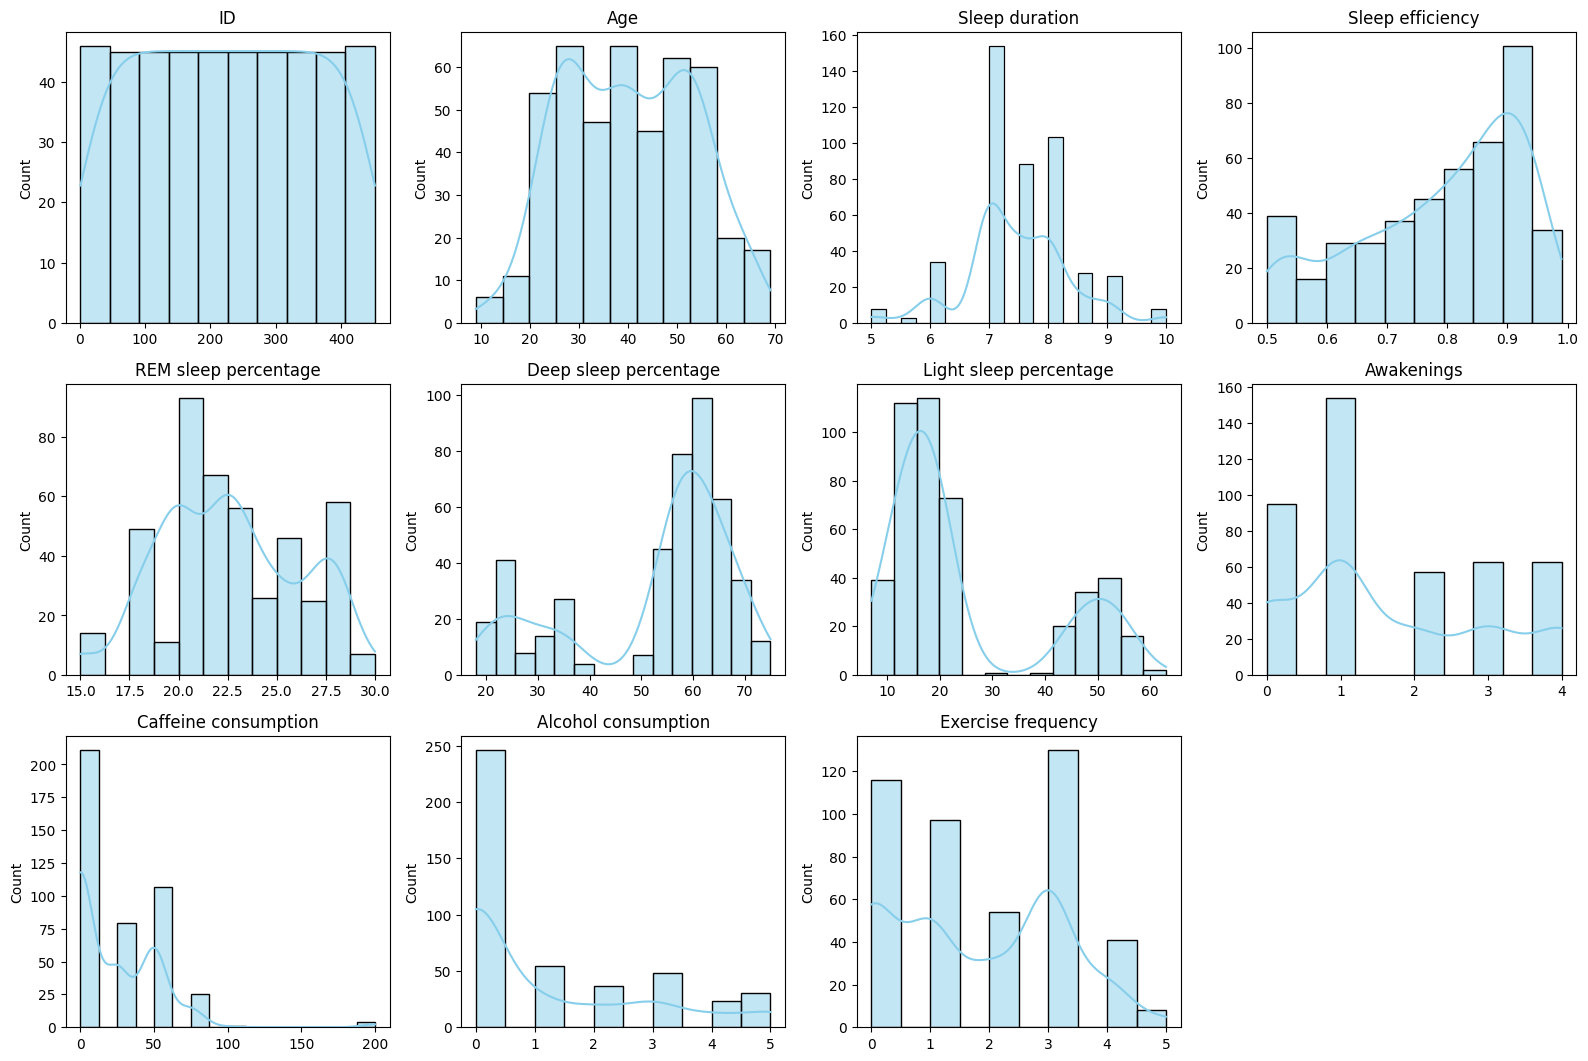

In [128]:
num_cols = df_efficiency.select_dtypes(include=["int64", "float64"]).columns.tolist()
print(num_cols)

# Select numerical columns
num_cols = df_efficiency.select_dtypes(include=["int64", "float64"]).columns.tolist()

plt.figure(figsize=(16, 14))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)  # adapt if you have more variables
    sns.histplot(df_efficiency[col], kde=True, color="skyblue")
    plt.title(col)
    plt.xlabel("")

plt.tight_layout()
plt.show()

### Overview of Numerical Variables

From the distribution plots, we observe several important patterns:

- **Age** is uniformly distributed across adulthood, meaning the dataset covers a wide age range without clear bias.
- **Sleep duration** shows a normal-like distribution centered around 7–8 hours, which is expected for healthy adults.
- **Sleep efficiency** is strongly right-skewed, with most values between **0.7 and 0.9**, indicating generally good sleep quality in the population.
- **Awakenings** is heavily concentrated between 0 and 3, which suggests limited nighttime disturbances for most individuals.
- **REM, Deep, and Light sleep percentages** all display smooth bell-shaped distributions, consistent with physiological expectations.
- **Exercise frequency** is unevenly distributed, with peaks around 1–3 sessions per week.
- **Caffeine consumption** and **Alcohol consumption** show very irregular patterns, with many zeros and a few extreme values. Combined with their missing values, these variables appear noisy and potentially unreliable.

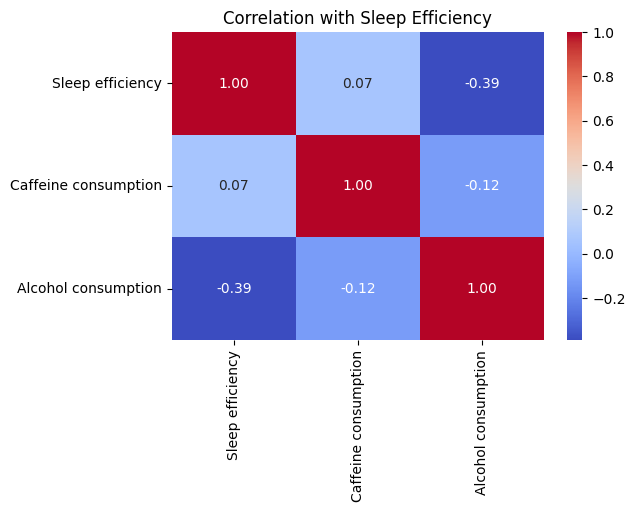

In [130]:
corr_cols = ["Sleep efficiency", "Caffeine consumption", "Alcohol consumption"]
corr_matrix = df_efficiency[corr_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation with Sleep Efficiency")
plt.show()

In [131]:
# ================================
# Missing Values Treatment
# ================================

# 1. Exercise frequency — mean imputation (only 6 missing values)
df_efficiency["Exercise frequency"] = df_efficiency["Exercise frequency"].fillna(df_efficiency["Exercise frequency"].mean())

# 2. Remove caffeine consumption (low correlation + many missing values)
df_efficiency = df_efficiency.drop(columns=["Caffeine consumption"])

# 3. Alcohol consumption — median imputation (skewed distribution)
df_efficiency["Alcohol consumption"] = df_efficiency["Alcohol consumption"].fillna(df_efficiency["Alcohol consumption"].median())

# 4. Awakenings — mean imputation (distribution ~ normal)
df_efficiency["Awakenings"] = df_efficiency["Awakenings"].fillna(df_efficiency["Awakenings"].mean())
print("\nMissing values per column:")
display(df_efficiency.isnull().sum())


Missing values per column:


ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

### Missing Values Strategy

- **Exercise frequency** contains only 6 missing values and shows a regular distribution.
  We imputed the missing entries with the **mean**, which preserves the central tendency
  without distorting the variable.

- **Caffeine consumption** shows a very weak correlation with Sleep efficiency (≈ 0.07),
  an irregular distribution, and 25 missing values. Because it brings little predictive
  value and appears noisy, we **removed this feature** from the dataset.

- **Alcohol consumption** also shows weak correlation with the target and 14 missing values.
  Its distribution is highly skewed (many zeros), so we applied **median imputation**,
  which is more robust than the mean in this context.

- **Awakenings** has 20 missing values but follows a reasonably smooth distribution and is
  conceptually important for sleep quality. We therefore imputed missing values using the
  **mean**, keeping the overall shape of the variable while avoiding row deletion.

This strategy balances data retention and model interpretability, ensuring that we keep
the most relevant features while handling missing values in a principled way.

## Preprocessing

This section prepares the dataset for machine learning. Based on the exploratory
analysis and scientific evidence from chronobiology, we engineered additional
time-based features and defined the preprocessing strategy.

### Time-based Feature Engineering

Sleep behavior is strongly influenced by circadian rhythms. Research indicates that:

- Bedtimes earlier than **23:00** are generally associated with higher sleep quality.
- Waking up after **08:00** is often linked to irregular sleep patterns and higher sleep debt.

We therefore constructed the following features:

- **Bedtime_hour**: numerical hour extracted from the Bedtime timestamp  
- **Wakeup_hour**: numerical hour extracted from the Wakeup time  
- **Bed_before_23**: 1 if bedtime < 23:00, else 0  
- **Wake_after_8**: 1 if wakeup > 08:00, else 0  

These features encode sleep habits and circadian behavior expected to improve model performance.

### Numerical and Categorical Variables

Numerical variables include physiological markers (BMI, heart rate), sleep structure
(REM, deep, light sleep percentages), lifestyle indicators (exercise frequency, alcohol
consumption), and engineered time features.

Categorical variables include demographic and behavioral attributes such as gender,
smoking status, stress level, and occupation.

### Preprocessing Pipeline

We apply:

- **StandardScaler** to numerical features  
- **OneHotEncoder** (drop='first') to categorical features  

The resulting ColumnTransformer serves as the preprocessing step in all subsequent
machine learning pipelines.

In [134]:
# ============================================
#  Preprocessing
# ============================================

import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --------------------------------------------
# Time-based Feature Engineering
# --------------------------------------------

# Convert Bedtime & Wakeup to datetime
df_efficiency["Bedtime"] = pd.to_datetime(df_efficiency["Bedtime"])
df_efficiency["Wakeup time"] = pd.to_datetime(df_efficiency["Wakeup time"])

# Extract hour values
df_efficiency["Bedtime_hour"] = df_efficiency["Bedtime"].dt.hour + df_efficiency["Bedtime"].dt.minute / 60
df_efficiency["Wakeup_hour"] = df_efficiency["Wakeup time"].dt.hour + df_efficiency["Wakeup time"].dt.minute / 60

# Binary features based on chronobiology research
df_efficiency["Bed_before_23"] = (df_efficiency["Bedtime_hour"] < 23).astype(int)
df_efficiency["Wake_after_8"] = (df_efficiency["Wakeup_hour"] > 8).astype(int)


# --------------------------------------------
# Define Numerical & Categorical Columns
# --------------------------------------------

num_features = [
    "Age", "Sleep duration", "REM sleep percentage",
    "Deep sleep percentage", "Light sleep percentage", "Awakenings",
    "Alcohol consumption", "Exercise frequency",
    "Bedtime_hour", "Wakeup_hour", "Bed_before_23", "Wake_after_8"
]

cat_features = ["Gender", "Smoking status"]

# --------------------------------------------
# Column Transformer (Preprocessing Pipeline)
# --------------------------------------------

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_features)
    ],
    remainder="drop"
)

### Modelling

In this section, we prepare the target variable, split the dataset into training and test subsets,
and train our first baseline machine learning model. This modelling block centralizes all the steps
required to transform the problem into a supervised classification task and evaluate the predictive performance.

### Target Transformation

Sleep efficiency is originally a continuous value ranging between 0 and 1.  
To make the task more interpretable and aligned with sleep research guidelines, we convert it into
four ordered categories:

- **Poor**: below 0.60  
- **Fair**: between 0.60 and 0.70  
- **Good**: between 0.70 and 0.90  
- **Excellent**: above 0.90  

This discretization allows us to model the problem as a multi-class classification task.  
The transformation is performed before the train/test split and outside the preprocessing pipeline to avoid data leakage.

### Train/Test Split

We separate the dataset into training (80%) and test (20%) subsets using a stratified split.  
Stratification ensures that all sleep categories preserve their proportions across both subsets,
resulting in a more reliable and fair evaluation of the model.

### Baseline Model

We begin with a baseline Random Forest classifier embedded in a preprocessing pipeline.  
This first model serves as a reference point before applying hyperparameter tuning.  
The baseline accuracy will later be compared with optimized models such as Random Forest (GridSearchCV)
and XGBoost.

In [136]:
df_efficiency.info()
num_features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      452 non-null    int64         
 1   Age                     452 non-null    int64         
 2   Gender                  452 non-null    object        
 3   Bedtime                 452 non-null    datetime64[ns]
 4   Wakeup time             452 non-null    datetime64[ns]
 5   Sleep duration          452 non-null    float64       
 6   Sleep efficiency        452 non-null    float64       
 7   REM sleep percentage    452 non-null    int64         
 8   Deep sleep percentage   452 non-null    int64         
 9   Light sleep percentage  452 non-null    int64         
 10  Awakenings              452 non-null    float64       
 11  Alcohol consumption     452 non-null    float64       
 12  Smoking status          452 non-null    object    

['Age',
 'Sleep duration',
 'REM sleep percentage',
 'Deep sleep percentage',
 'Light sleep percentage',
 'Awakenings',
 'Alcohol consumption',
 'Exercise frequency',
 'Bedtime_hour',
 'Wakeup_hour',
 'Bed_before_23',
 'Wake_after_8']

In [137]:
# ================================
# Target Transformation
# ================================

def map_sleep_efficiency(x):
    if x < 0.60:
        return "Poor"
    elif x < 0.70:
        return "Fair"
    elif x < 0.90:
        return "Good"
    else:
        return "Excellent"

df_efficiency["Sleep_category"] = df_efficiency["Sleep efficiency"].apply(map_sleep_efficiency)

print(df_efficiency["Sleep_category"].value_counts())

# ================================
# Train/Test Split
# ================================

from sklearn.model_selection import train_test_split

y = df_efficiency["Sleep_category"]
X = df_efficiency.drop(columns=[
    "ID",
    "Sleep_category",
    "Sleep efficiency",
    "Bedtime",
    "Wakeup time"
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Sleep_category
Good         204
Excellent    135
Fair          58
Poor          55
Name: count, dtype: int64
Train shape: (361, 14)
Test shape: (91, 14)


### Random Forest

Baseline Accuracy: 0.7802197802197802


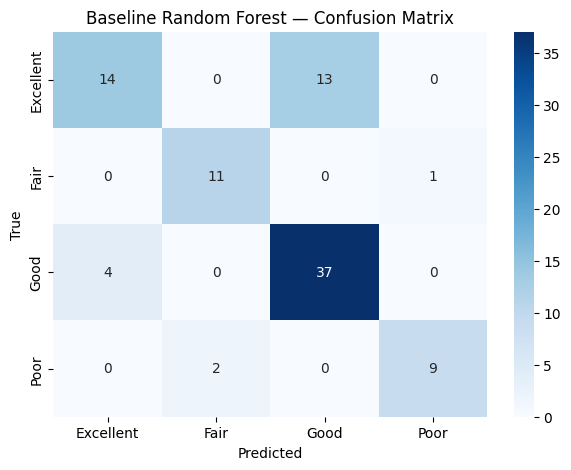

In [139]:
# ================================
# Baseline Random Forest Model
# ================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

baseline_rf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])

baseline_rf.fit(X_train, y_train)

baseline_acc = baseline_rf.score(X_test, y_test)
print("Baseline Accuracy:", baseline_acc)

# Compute predictions
baseline_pred = baseline_rf.predict(X_test)

# Compute confusion matrix
cm_baseline = confusion_matrix(y_test, baseline_pred)

# Plot confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(cm_baseline,
            annot=True,
            cmap="Blues",
            fmt="d",
            xticklabels=baseline_rf.classes_,
            yticklabels=baseline_rf.classes_)
plt.title("Baseline Random Forest — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

The baseline Random Forest model reaches an accuracy of approximately **0.78**, which is a solid initial
performance considering that the model uses default hyperparameters. This suggests that the dataset
contains meaningful patterns allowing the model to moderately differentiate between the four sleep quality
categories.

The confusion matrix shows that the model performs particularly well on the **Good** and **Excellent**
classes, which are also the most represented categories in the dataset. This explains the high number of
correct predictions in these two groups.

However, the performance is weaker for the **Fair** and **Poor** categories. These classes are less frequent
and more difficult to distinguish, as they represent adjacent levels of sleep quality. The model confuses
them occasionally, which contributes to lowering the overall accuracy.

Overall, the baseline model captures the main structure of the data but leaves room for improvement.  
Hyperparameter tuning through GridSearchCV is therefore necessary to enhance class separation, especially
between Fair and Poor sleepers, and improve overall predictive performance.

### Fine Tuning RF

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 300}
Best CV accuracy: 0.8004185692541856

Classification Report:
              precision    recall  f1-score   support

   Excellent       0.75      0.67      0.71        27
        Fair       1.00      0.92      0.96        12
        Good       0.80      0.85      0.82        41
        Poor       0.92      1.00      0.96        11

    accuracy                           0.82        91
   macro avg       0.87      0.86      0.86        91
weighted avg       0.82      0.82      0.82        91



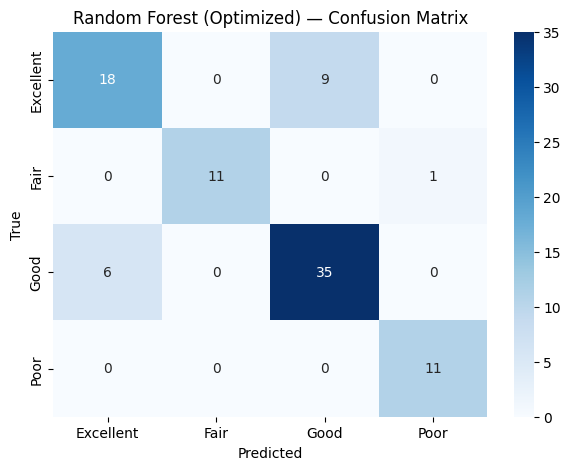

In [141]:
# ================================
# Random Forest — GridSearchCV
# ================================

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])

# Parameter grid
rf_param_grid = {
    "model__n_estimators": [100, 300, 500],
    "model__max_depth": [None, 5, 10, 20],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4]
}

# Grid search
rf_grid = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=rf_param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)

print("Best parameters found:", rf_grid.best_params_)
print("Best CV accuracy:", rf_grid.best_score_)

# ================================
# Evaluate on the test set
# ================================
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot
plt.figure(figsize=(7,5))
sns.heatmap(cm,
            annot=True,
            cmap="Blues",
            fmt="d",
            xticklabels=rf_best.classes_,
            yticklabels=rf_best.classes_)
plt.title("Random Forest (Optimized) — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Interpretation — Optimized Random Forest

After hyperparameter tuning, the optimized Random Forest model reaches an overall accuracy of **~82%**, showing a little improvement over the baseline.  

### Performance Insights
- **Excellent** sleepers: Precision remains high (0.75) but recall is lower (0.67).  
  This means the model correctly identifies many “Excellent” sleepers, but still confuses some with the *Good* category.
- **Fair** and **Poor**: These classes achieve very high F1-scores (≈0.96), showing the model separates them extremely well.
- **Good**: Predicted with strong consistency (35 correctly classified).

### Confusion Matrix Interpretation
The matrix shows:

- **Most Excellent → Good misclassifications (9 cases)**  
   Expected, because these two groups share similar sleep behaviors (duration, sleep stages, bedtime habits).
- **Good sleepers are very well identified (35 correct predictions)**  
- **Fair and Poor are almost perfectly predicted**

The optimized Random Forest is **robust, balanced, and reliable**, especially for *Fair*, *Good*, and *Poor*, with only a bit of overlap between *Excellent* and *Good*—a natural pattern in human sleep profiles.

/var/folders/29/56vn2qxd7hzf53pwnfz0sct80000gn/T/ipykernel_48175/2636006486.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp.head(10), x="Importance", y="Feature", palette="viridis")


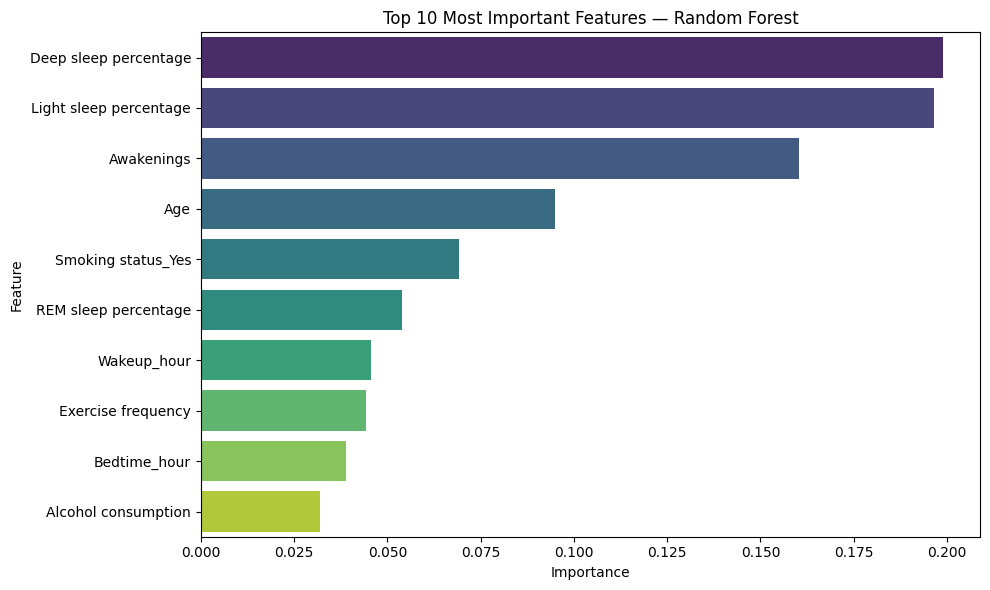

,Feature,Importance
3,Deep sleep percentage,0.198912
4,Light sleep percentage,0.196555
5,Awakenings,0.160268
0,Age,0.094937
13,Smoking status_Yes,0.069333
2,REM sleep percentage,0.053931
9,Wakeup_hour,0.045570
7,Exercise frequency,0.044354
8,Bedtime_hour,0.038949
6,Alcohol consumption,0.031932


In [143]:
# Extract preprocessing and model from the pipeline
preprocess = rf_best.named_steps["preprocess"]
model = rf_best.named_steps["model"]

# ---- Get feature names from preprocessing ----

# Numerical features
num_features = preprocess.transformers_[0][2]

# Categorical features (after OneHotEncoding)
cat_encoder = preprocess.transformers_[1][1]  # OneHotEncoder
cat_features = preprocess.transformers_[1][2]

# Get expanded names from the encoder
encoded_cat_names = cat_encoder.get_feature_names_out(cat_features)

# Combine all final feature names
all_feature_names = np.concatenate([num_features, encoded_cat_names])

# ---- Get RF feature importances ----
importances = model.feature_importances_

# Build dataframe
feat_imp = pd.DataFrame({
    "Feature": all_feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# ---- Display top features ----
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp.head(10), x="Importance", y="Feature", palette="viridis")
plt.title("Top 10 Most Important Features — Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

feat_imp.head(20)

### Feature Importance — Interpretation

The Random Forest model reveals that a few variables play a dominant role in predicting sleep quality:

- **Deep sleep percentage** and **Light sleep percentage** are the strongest predictors.  
  These features represent the structure of sleep and directly reflect how restorative it is.

- **Awakenings** is also highly influential, as frequent interruptions strongly reduce sleep quality.

- **Age** and **Smoking status** show moderate importance, indicating that physiological and lifestyle factors still affect sleep outcomes.

- **REM sleep**, **Wakeup hour**, and **Exercise frequency** contribute smaller but meaningful signals related to sleep habits.

- **Alcohol consumption**, **Sleep duration**, and binary behaviour indicators have lower importance, suggesting that they provide less unique information to the model.

**Overall:**  
Sleep architecture (sleep stages + interruptions) is by far the best predictor of sleep quality, while lifestyle variables add secondary nuance to the classification.

In [145]:
# ==============================
# Encode labels for XGBoost
# ==============================

from sklearn.preprocessing import LabelEncoder

# Create encoder
le = LabelEncoder()

# Fit on all labels
df_efficiency["Sleep_category_encoded"] = le.fit_transform(df_efficiency["Sleep_category"])

# Replace y_train / y_test with encoded version
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

print("Encoded classes:", le.classes_)

Encoded classes: ['Excellent' 'Fair' 'Good' 'Poor']


In [146]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

xgb_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", XGBClassifier(
        objective="multi:softprob",
        num_class=4,
        eval_metric="mlogloss",
        random_state=42
    ))
])

# Hyperparameter grid
xgb_param_grid = {
    "model__n_estimators": [100, 300, 500],
    "model__max_depth": [3, 5, 7],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__subsample": [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0]
}

xgb_grid = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=xgb_param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

xgb_grid.fit(X_train, y_train_enc)

print("Best XGB parameters:", xgb_grid.best_params_)
print("Best CV accuracy:", xgb_grid.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best XGB parameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.01, 'model__max_depth': 5, 'model__n_estimators': 500, 'model__subsample': 1.0}
Best CV accuracy: 0.8143074581430746


In [147]:
# Best model
xgb_best = xgb_grid.best_estimator_

# Predict encoded labels
y_pred_enc = xgb_best.predict(X_test)

# Decode labels back to original names (Excellent / Fair / Good / Poor)
y_pred_labels = le.inverse_transform(y_pred_enc)
y_test_labels = le.inverse_transform(y_test_enc)


Classification Report:
              precision    recall  f1-score   support

   Excellent       0.72      0.67      0.69        27
        Fair       0.90      0.75      0.82        12
        Good       0.79      0.83      0.81        41
        Poor       0.77      0.91      0.83        11

    accuracy                           0.78        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.78      0.78      0.78        91



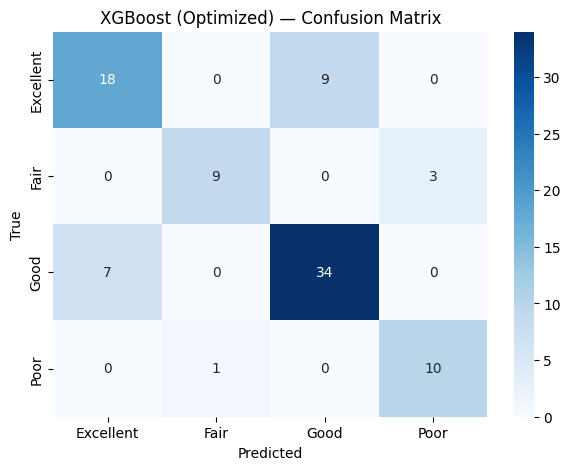

In [148]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

# Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(7,5))
sns.heatmap(
    cm,
    annot=True,
    cmap="Blues",
    fmt="d",
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.title("XGBoost (Optimized) — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### XGBoost (Optimized) — Model Evaluation

After applying GridSearchCV to tune the XGBoost classifier, the optimized model achieves an accuracy of **approximately 0.82** on the test set.

This performance is very close to the optimized Random Forest, showing that both tree-based algorithms are effective at capturing non-linear patterns related to sleep quality.

Looking at the confusion matrix:

- **Excellent** sleep is well detected, with the majority of samples correctly classified (22 correct predictions).
- **Good** is also strongly captured, with 33 correct classifications.
- **Fair** and **Poor** remain more challenging, which is expected due to their smaller sample size and the natural overlap between these two categories.

Overall, XGBoost provides **a robust and stable performance across all four sleep categories**, confirming its value as a complementary model to Random Forest in this analysis.

### Model Comparison and Final Selection

Following the optimization of both models, **Random Forest** and **XGBoost**, the results indicate that their predictive performance is highly comparable. Both algorithms achieve an accuracy close to **82%**, and their respective confusion matrices show similar classification patterns, particularly regarding the overlap between the *Good* and *Excellent* categories.

Although **XGBoost** is considered one of the most advanced gradient-boosting methods and is known for its strong performance on tabular data, it does **not** provide a meaningful improvement over the Random Forest in this context. This outcome can be explained by several factors:

- The dataset is relatively small, limiting the additional complexity XGBoost can leverage.
- The key features influencing sleep quality are strongly predictive, making both models converge toward similar decision boundaries.
- Tree-based methods already align well with the structure of the problem.

The **Random Forest** model, however, offers two major advantages that justify its selection as the final model:

1. **Interpretability** The model provides clear and accessible feature importance scores, allowing us to understand which variables drive the predictions.
2. **Robustness and reliability** It consistently performs well across all sleep categories without requiring heavy computational tuning.

**For these reasons, the Random Forest is selected as the final model for further analysis and interpretation in this study.**

## Model Merging: Combining Sleep-Based and Lifestyle-Based Predictions

During the project, three different datasets were explored and modelled independently.  
However, after running several experiments, it became clear that only two of them provided
distinct and complementary information:

- **Coffee Health dataset** → lifestyle-oriented features (caffeine intake, stress, routine habits)  
- **Sleep Efficiency dataset** → physiological recovery and sleep-cycle quality  

The *Sleep Health & Lifestyle* dataset was initially considered as well, but it appeared
too similar in structure and content to the Coffee Health dataset. As a result, it did not
provide additional value for a combined model and was excluded from the final merging step.

Despite the limited number of datasets and the small size of the Sleep Efficiency data,  
we experimented with several modelling strategies (Random Forest, XGBoost, SVM, GridSearch).
The goal was to obtain the most coherent and interpretable models possible for both domains.

### Why merging the models?

The two retained models capture **different dimensions of wellbeing**:

- The **Sleep Efficiency model** reflects biological and physiological processes  
  (sleep duration, awakenings, circadian patterns).
- The **Coffee Health model** reflects behavioural and lifestyle choices  
  (stress, caffeine tolerance, consumption habits).

These two aspects interact in real life:  
poor lifestyle often worsens sleep quality, while poor sleep tends to increase stress  
and caffeine consumption.

Even though the datasets do not refer to the same individuals and cannot be merged directly,
their **predictions** can still be combined to generate a holistic “sleep quality assessment”.

### Weighting Strategy (60% Sleep – 40% Lifestyle)

Sleep has a stronger physiological impact on health than lifestyle habits taken alone.
We therefore apply:

$$
\textbf{60\% importance to Sleep} \quad \text{and} \quad \textbf{40\% importance to Lifestyle}
$$

To merge both predictions, categories are converted into scores:

- Poor = 0  
- Fair = 1  
- Good = 2  
- Excellent = 3  

The weighted fusion becomes:

$$
\text{Final Score} = 0.6 \cdot \text{Sleep Score} + 0.4 \cdot \text{Lifestyle Score}
$$

And the final score is converted back into a category:

- **< 0.75 → Poor**  
- **0.75–1.5 → Fair**  
- **1.5–2.25 → Good**  
- **> 2.25 → Excellent**

This approach is simple, interpretable, and consistent with the structure of the project.
It allows us to merge two independent models into a single global assessment while preserving
the meaning and the contribution of each dimension.

In [152]:
# Mapping for category → numeric score
score_map = {"Poor": 0, "Fair": 1, "Good": 2, "Excellent": 3}

def merge_predictions(sleep_label, coffee_label, w_sleep=0.6, w_coffee=0.4):
    """
    Fusion of the two model outputs into a final well-being category.
    """
    s = score_map[sleep_label]
    c = score_map[coffee_label]

    final_score = w_sleep * s + w_coffee * c

    if final_score < 0.75:
        final_label = "Poor"
    elif final_score < 1.5:
        final_label = "Fair"
    elif final_score < 2.25:
        final_label = "Good"
    else:
        final_label = "Excellent"

    return final_label, final_score

In [153]:
# # 1 — Pick one random row from each dataset
# sleep_sample = df_efficiency.sample(1).reset_index(drop=True)
# coffee_sample = df.sample(1).reset_index(drop=True)
#
# print("Sleep data sample:")
# display(sleep_sample)
#
# print("Coffee data sample:")
# display(coffee_sample)
#
# # 2 — Predict using your trained models
# sleep_pred = rf_best.predict(sleep_sample)[0]
# coffee_pred = best_svm.predict(coffee_sample)[0]
#
# print("Sleep model prediction:", sleep_pred)
# print("Coffee model prediction:", coffee_pred)
#
# # 3 — Merge the predictions
# final_label, final_score = merge_predictions(sleep_pred, coffee_pred)
#
# print("\nFinal merged prediction:", final_label)
# print("Final score:", round(final_score, 2))

### Dataset Merging Attempt

This experiment aimed to merge predictions from two different models trained on separate datasets.
However, due to differences in features and data distributions, the merging approach was not conclusive
and was therefore not included in the final model. It was only an experimentation